# Analytical approach 

## For 20 data points

##  1. Polynomial regression without regularisation

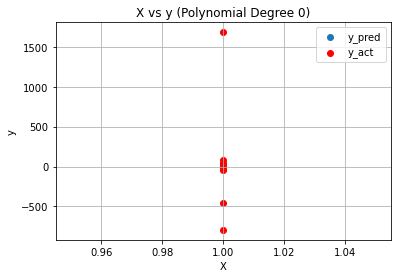

RMSE (degree2) 312.86917154085984
RMSE (degree2) 679.8519870727201


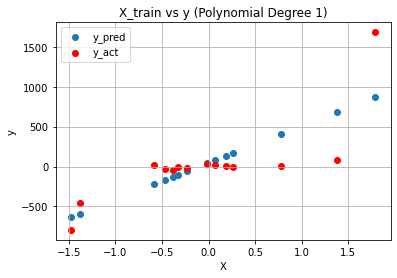

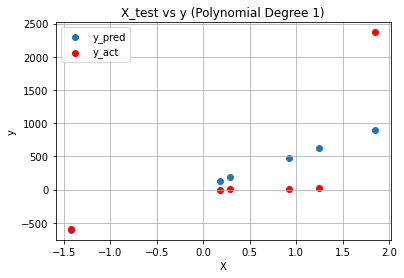

RMSE (degree3) 300.037112241949
RMSE (degree3) 613.8812512739748


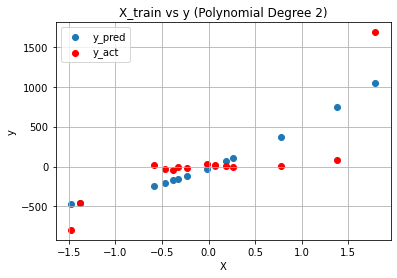

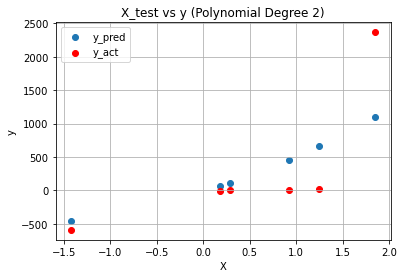

RMSE (degree4) 142.42732365818367
RMSE (degree4) 300.30353803225336


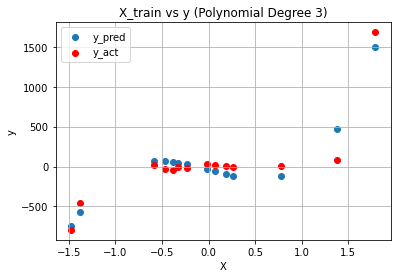

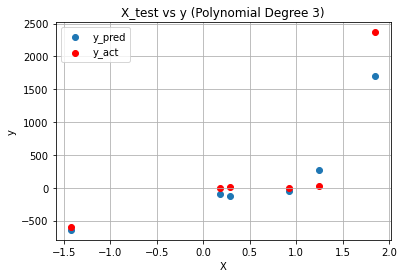

RMSE (degree5) 96.1052531858384
RMSE (degree5) 189.14044214286065


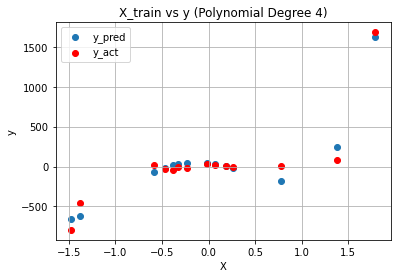

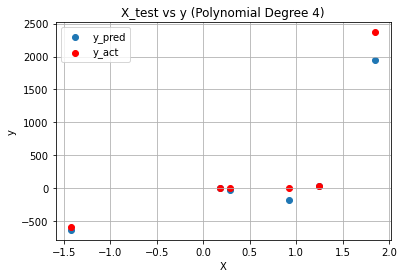

RMSE (degree6) 18.7849653472203
RMSE (degree6) 94.65051914571025


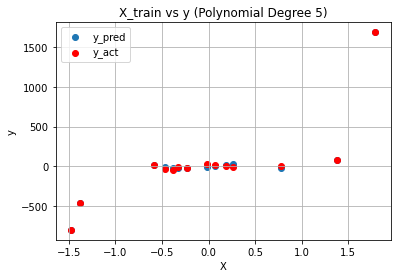

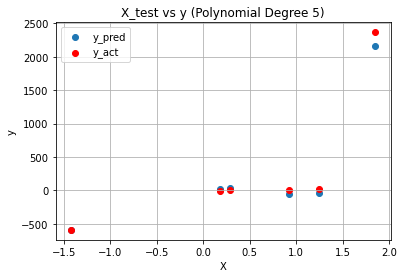

RMSE (degree7) 18.444492709342494
RMSE (degree7) 89.50414803116179


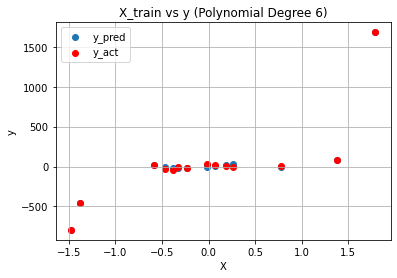

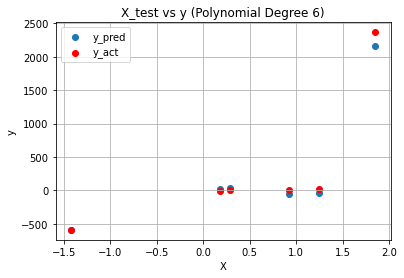

RMSE (degree8) 15.587081848197366
RMSE (degree8) 50.99765926322674


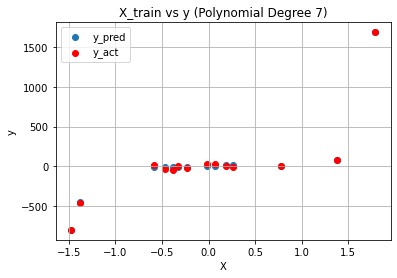

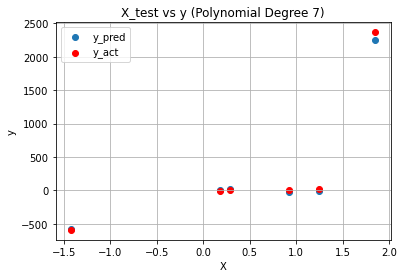

RMSE (degree9) 8.247628536156775
RMSE (degree9) 278.1892771845245


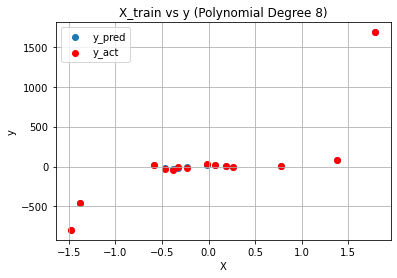

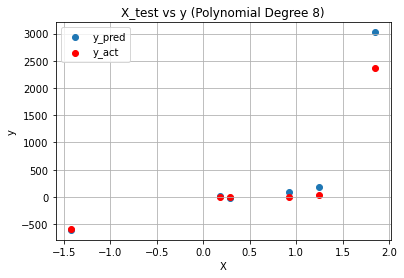

RMSE (degree10) 7.972480492538158
RMSE (degree10) 226.06890833272973


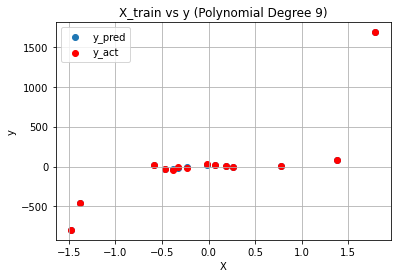

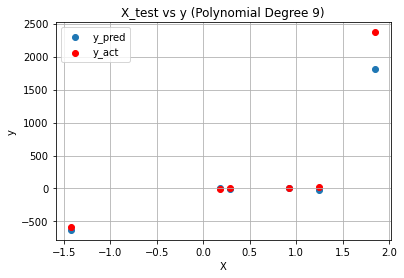

RMSE (degree11) 7.9657096770491895
RMSE (degree11) 981.2282203797071


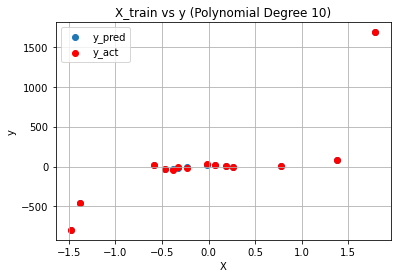

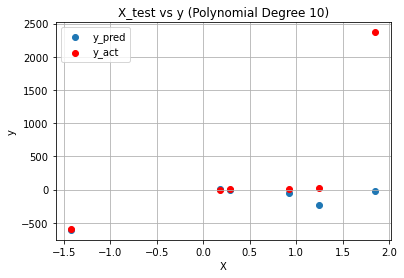

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import pylab
import scipy.stats as stats

df1 = pd.read_csv("train_1.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

n = len(y_train)
m= len(y_test)

X_list_train=[np.ones((n,1))]
X_list_test=[np.ones((m,1))]
w_ml_list = []

X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
w_ml_list.append(w_ml)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
plt.scatter(X_l_train,y_pred,label='y_pred')
plt.scatter(X_l_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y (Polynomial Degree 0)")
plt.legend()
plt.grid(visible=True)
plt.show()

max_degree = 12
rmse_train = []
rmse_test = []
for i in range(2,max_degree):
    X_l_train = np.ones((n,1))
    X_l_test = np.ones((m,1))
    for j in range(1,i):
        X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
        X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
    X_list_train.append(X_l_train)
    X_list_test.append(X_l_test)
    w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
    w_ml_list.append(w_ml)
    y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
    y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

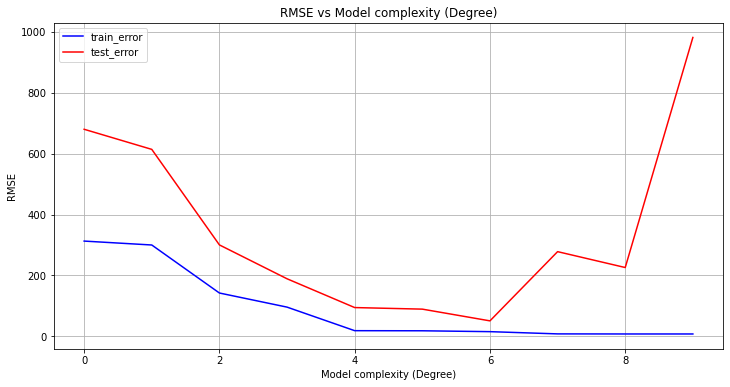

In [2]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree-2),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree-2),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for validation:  94.65051914571025


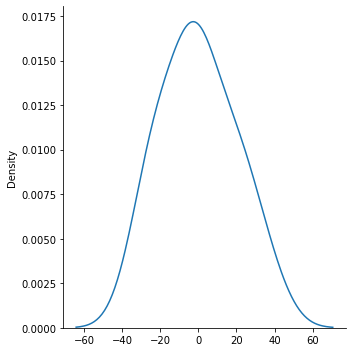

In [3]:
n = len(y_train)
m= len(y_test)
X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
degree=6
for j in range(1,degree):
    X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
    X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise = (y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')
print('rmse for validation: ', np.sqrt(mse(y_test_pred,y_test)))

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-29.80523996, -22.97643146, -22.55297235, -17.04244009,
          -5.94079482,  -5.19119721,  -1.89457983,  -0.80793958,
           0.72288981,   7.96976075,  16.16562255,  21.05620917,
          24.15634398,  36.14076905])),
 (20.61882375759304, 1.1751869318946513e-11, 0.9885005061338359))

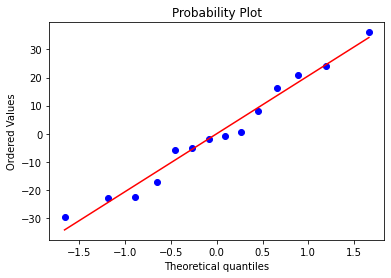

In [4]:
stats.probplot(train_noise,dist='norm',plot=pylab)

((array([-1.23132171, -0.63003387, -0.19819716,  0.19819716,  0.63003387,
          1.23132171]),
  array([-209.96059638,  -68.20671631,  -57.68618639,    2.29791539,
           28.00542515,   29.99060042])),
 (94.2344961999814, -45.926593019638325, 0.918549967125659))

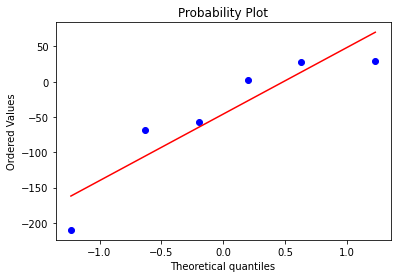

In [5]:
stats.probplot(y_test_pred.reshape(-1)-y_test,plot=pylab)

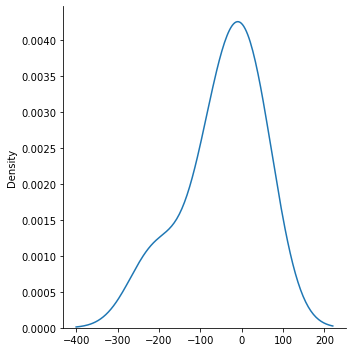

In [6]:
sns.displot(y_test_pred.reshape(-1)-y_test,kind='kde')

rmse for test:  305.5100834213129


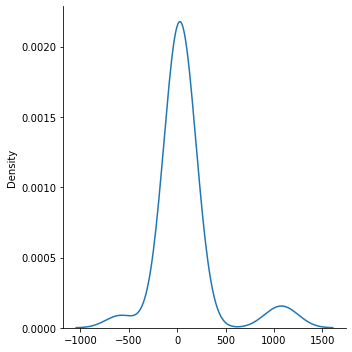

In [7]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])
m = len(y_t)
X_l_test = np.ones((m,1))
for j in range(1,degree):
    X_l_test = np.append(X_l_test, np.vstack(X_t**j),axis = 1)
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise = (y_test_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_test_pred,y_t)))

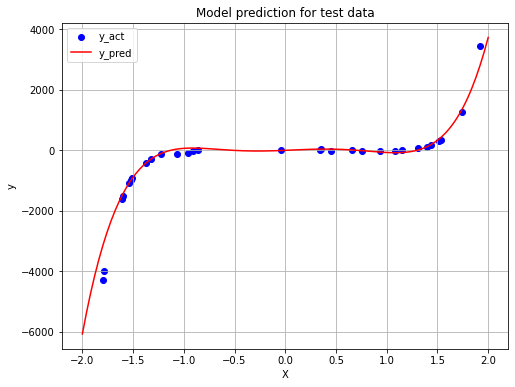

In [12]:
x_p = np.linspace(-2,2,200)
X_p = np.ones((len(x_p),1))
for j in range(1,degree):
    X_p = np.append(X_p, np.vstack(x_p**j),axis = 1)
y_p = np.dot(X_p,w_ml.reshape(-1,1))
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.plot(x_p,y_p,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
# print('Optimized weights:' , w_ml)

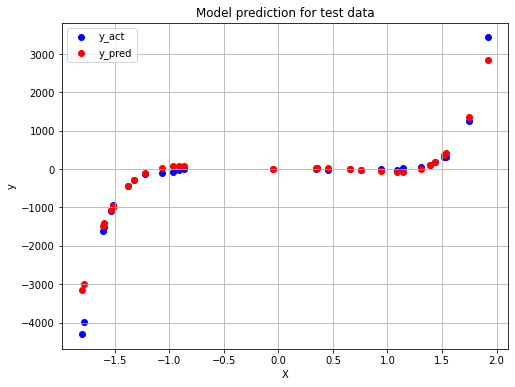

Optimized weights: [  -1.58369288  140.73719613   93.74282818 -471.53277322  -96.49888592
  262.14520821]


In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , w_ml)

## Overfitting

rmse for validation:  993625.1426183684


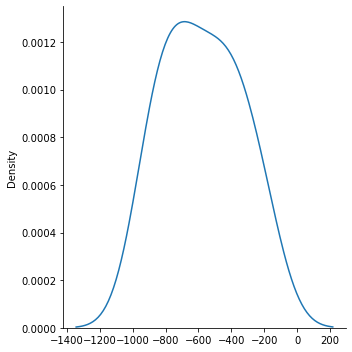

In [15]:
n = len(y_train)
m= len(y_test)
X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
degree=15
for j in range(1,degree):
    X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
    X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise = (y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')
print('rmse for validation: ', np.sqrt(mse(y_test_pred,y_test)))

rmse for test:  8502815.9229879


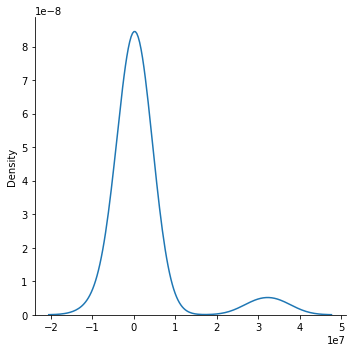

In [16]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])
m = len(y_t)
X_l_test = np.ones((m,1))
for j in range(1,degree):
    X_l_test = np.append(X_l_test, np.vstack(X_t**j),axis = 1)
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise = (y_test_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_test_pred,y_t)))

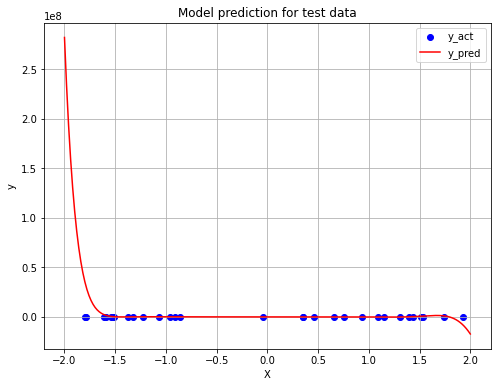

In [17]:
x_p = np.linspace(-2,2,200)
X_p = np.ones((len(x_p),1))
for j in range(1,degree):
    X_p = np.append(X_p, np.vstack(x_p**j),axis = 1)
y_p = np.dot(X_p,w_ml.reshape(-1,1))
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.plot(x_p,y_p,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()

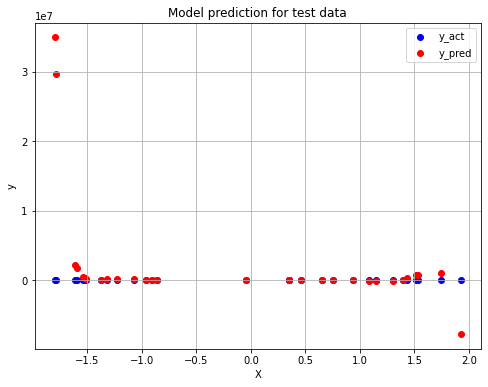

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()

In [12]:
l = []
for i in w_ml:
    l.append(int(f'{i:.0f}'))

##  2. Polynomial regression with L2 regularisation

RMSE (train)(degree0) 511.3768470489386
RMSE (test)(degree0) 986.5817662451113


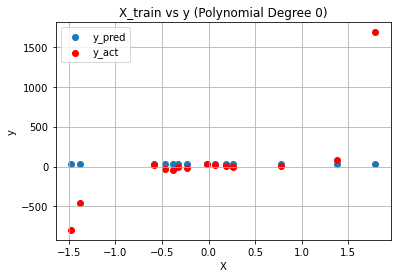

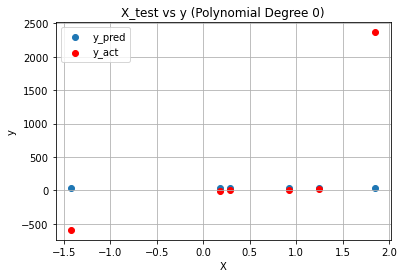

RMSE (train)(degree1) 314.75262798896085
RMSE (test)(degree1) 695.1106594458764


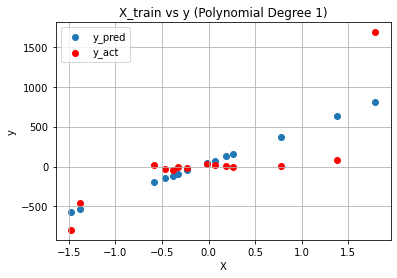

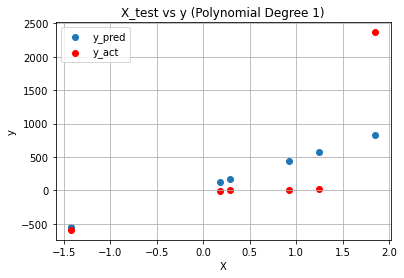

RMSE (train)(degree2) 301.8040262309747
RMSE (test)(degree2) 627.4695649503306


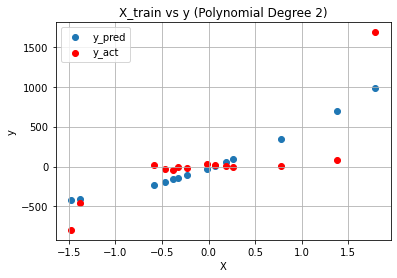

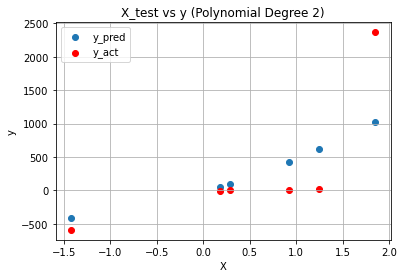

RMSE (train)(degree3) 153.8617708940249
RMSE (test)(degree3) 352.95972224210004


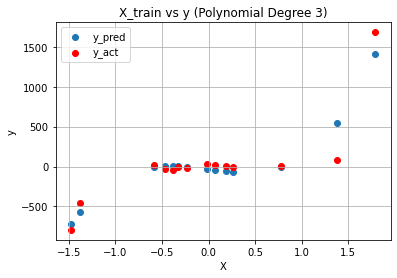

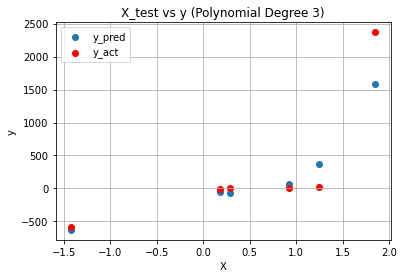

RMSE (train)(degree4) 121.02285785204745
RMSE (test)(degree4) 266.8278940002661


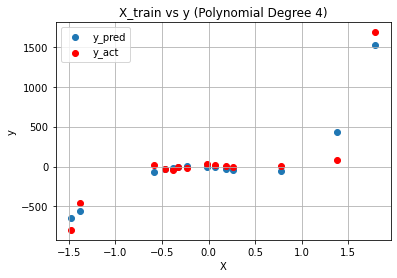

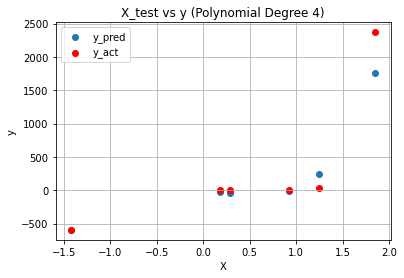

RMSE (train)(degree5) 55.52015625261628
RMSE (test)(degree5) 150.8185887275162


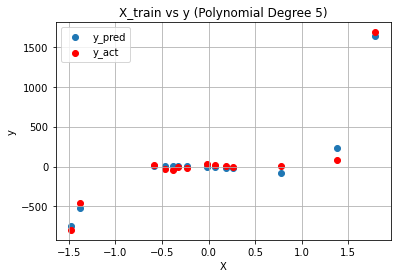

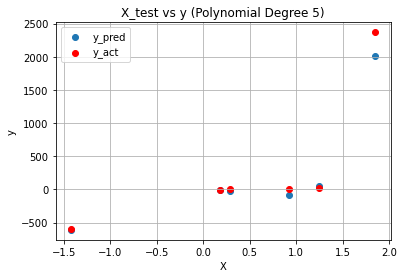

RMSE (train)(degree6) 48.83740053657409
RMSE (test)(degree6) 120.32046408175242


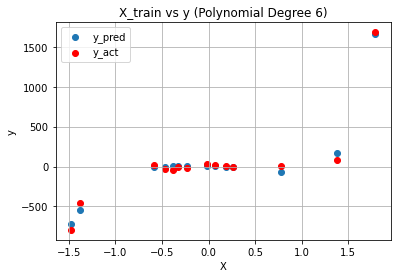

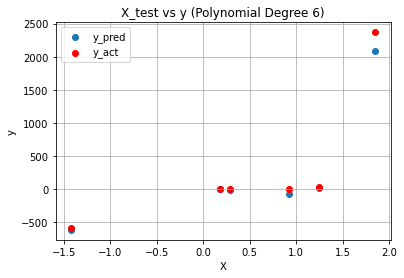

RMSE (train)(degree7) 20.673877275682557
RMSE (test)(degree7) 58.48556987867051


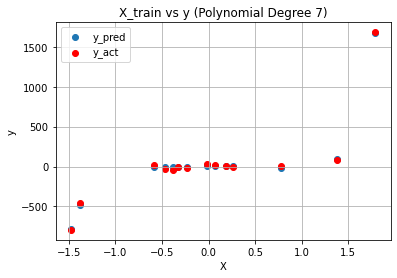

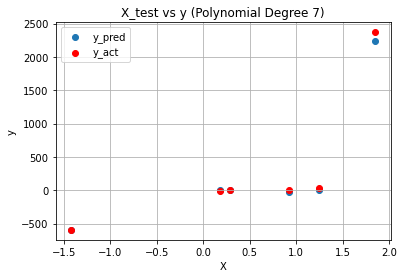

RMSE (train)(degree8) 20.972737460296987
RMSE (test)(degree8) 52.747806172727074


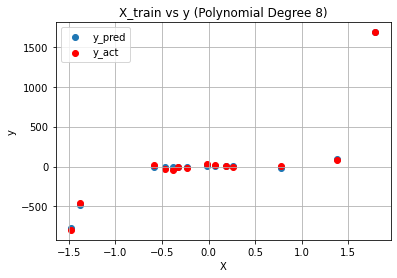

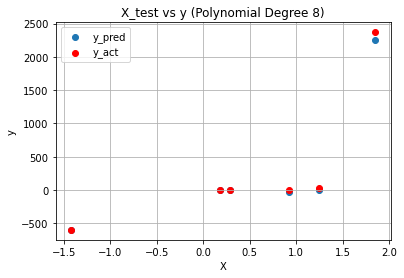

RMSE (train)(degree9) 16.958312032996126
RMSE (test)(degree9) 6.378444134649313


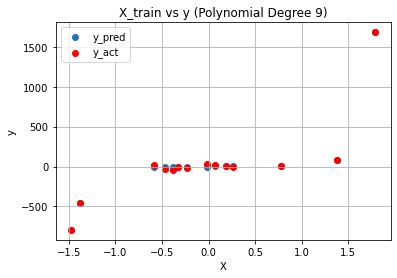

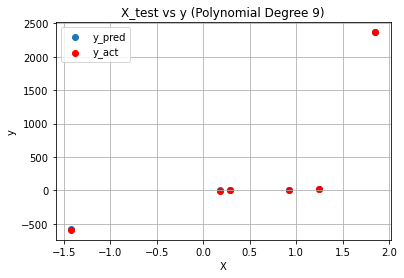

RMSE (train)(degree10) 16.958325744462485
RMSE (test)(degree10) 6.2821550202781875


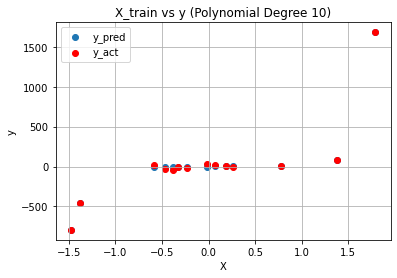

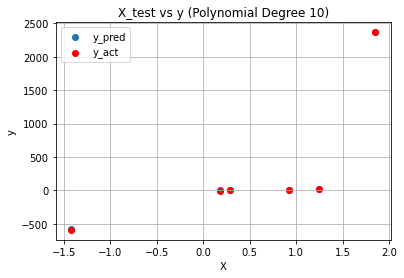

RMSE (train)(degree11) 16.991915448173707
RMSE (test)(degree11) 34.857191262696816


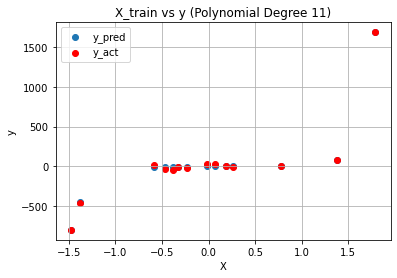

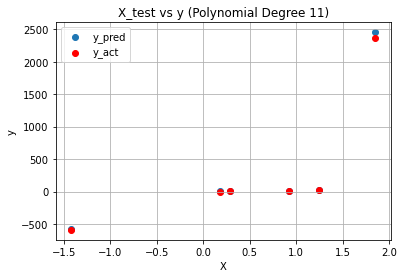

RMSE (train)(degree12) 16.97812840865511
RMSE (test)(degree12) 53.24747595375931


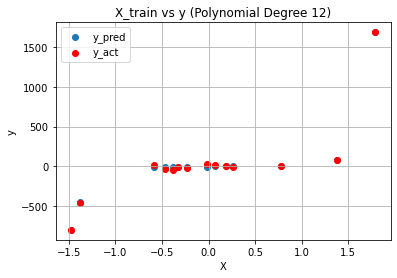

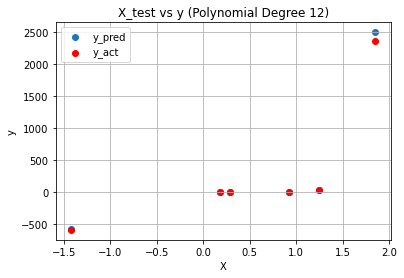

RMSE (train)(degree13) 16.96469056256078
RMSE (test)(degree13) 35.67127451554945


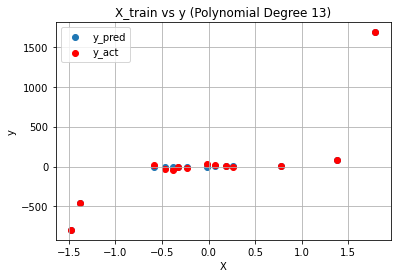

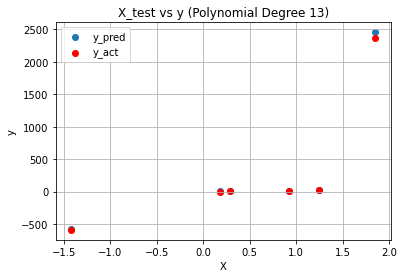

RMSE (train)(degree14) 16.956555575143437
RMSE (test)(degree14) 116.54539244262438


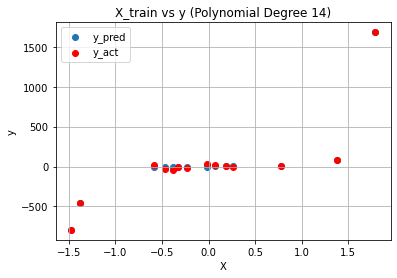

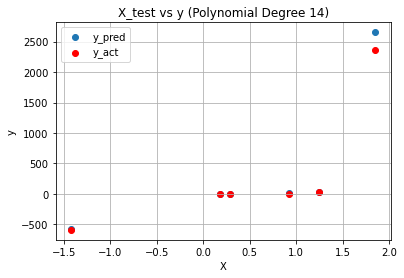

RMSE (train)(degree15) 16.932541880343944
RMSE (test)(degree15) 35.3188252624819


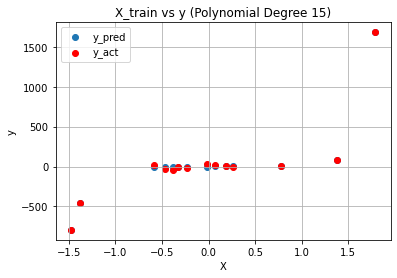

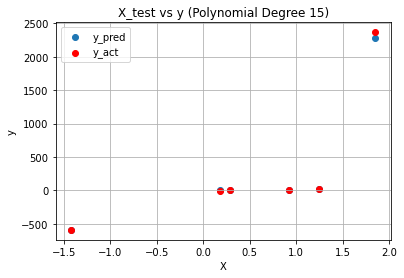

RMSE (train)(degree16) 16.929051736132745
RMSE (test)(degree16) 202.7814719534138


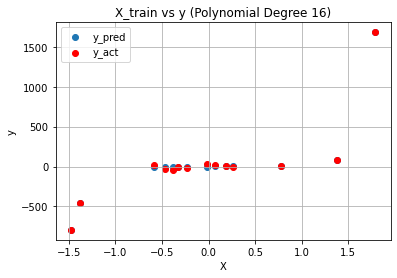

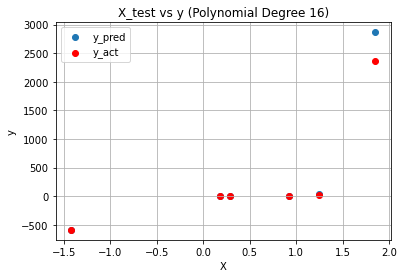

RMSE (train)(degree17) 16.91473443413335
RMSE (test)(degree17) 250.80163359096886


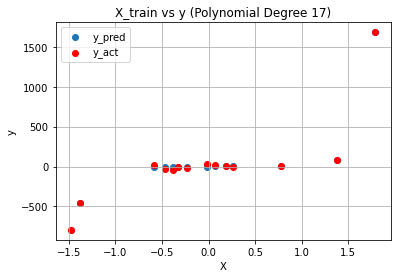

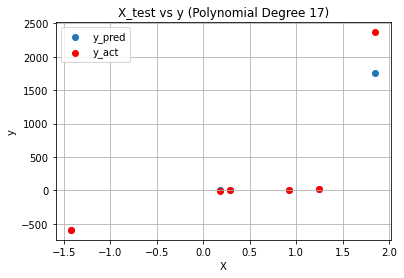

RMSE (train)(degree18) 16.913364325336453
RMSE (test)(degree18) 337.2287438032054


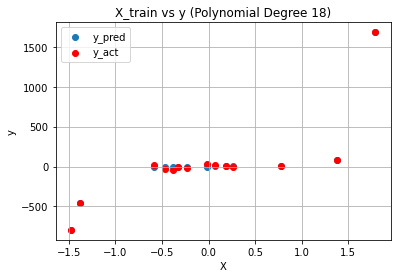

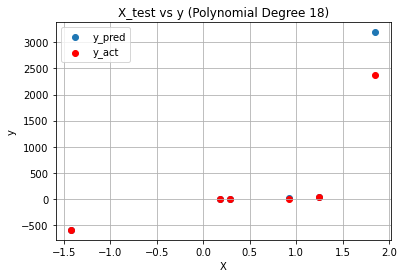

RMSE (train)(degree19) 16.906659213184987
RMSE (test)(degree19) 752.6345480057989


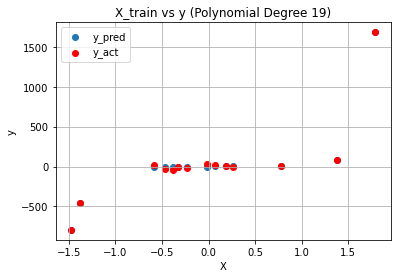

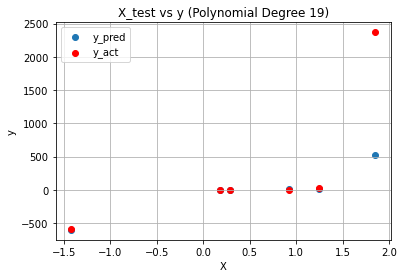

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
df1 = pd.read_csv("train_1.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Ridge()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

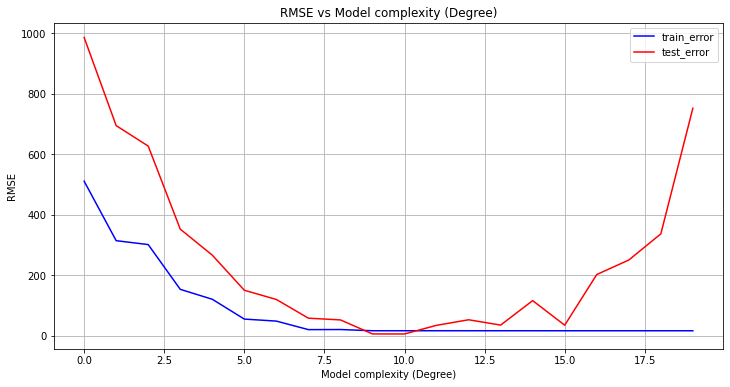

In [20]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test:  18.616383330972575


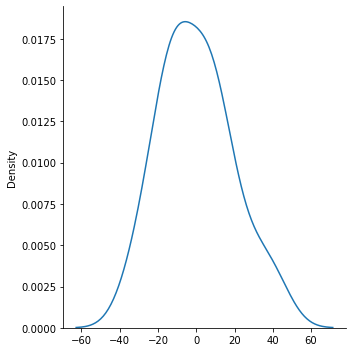

In [21]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 9)
x_poly = poly.fit_transform(X_t)
model = Ridge(alpha=1)
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))

In [22]:
l = []
for i in model.coef_:
    l.append(float(f'{i:.1f}'))

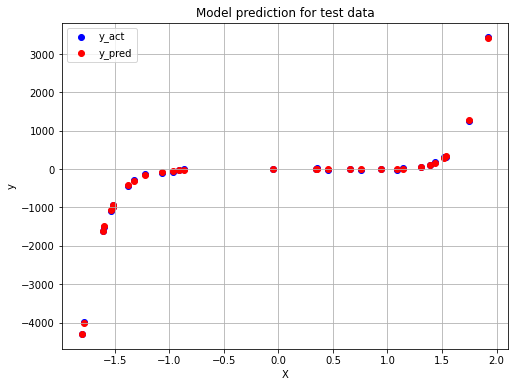

Optimized weights: [  0.           5.39724432 -16.10159866   5.34996944   0.73304245
   1.71488389   5.93541466  -9.08842977 -13.050025    17.79333689]


In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)

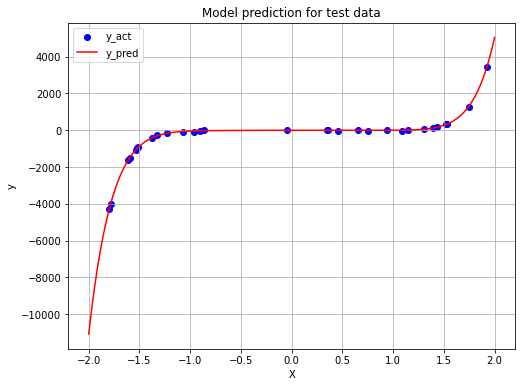

In [27]:
x_p = np.linspace(-2,2,200)
X_p = np.ones((len(x_p),1))
for j in range(1,10):
    X_p = np.append(X_p, np.vstack(x_p**j),axis = 1)
# y_p = np.dot(X_p,w_ml.reshape(-1,1))
y_p = model.predict(X_p)
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.plot(x_p,y_p,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()

## 3. Polynomial regression with L1 regularisation

RMSE (train)(degree0) 511.3768470489386
RMSE (test)(degree0) 986.5817662451113


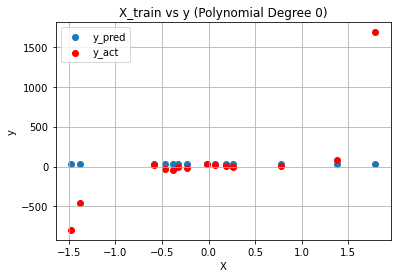

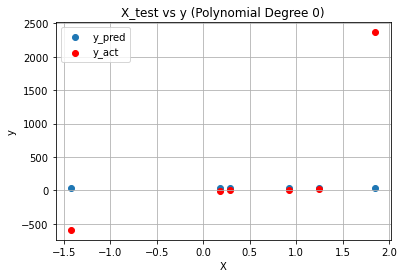

RMSE (train)(degree1) 312.8712499047878
RMSE (test)(degree1) 680.3144011828291


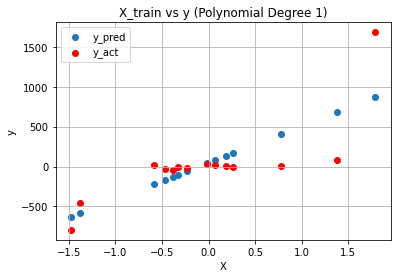

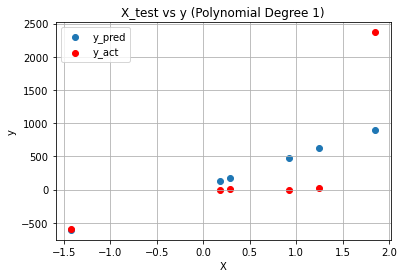

RMSE (train)(degree2) 300.04018778813116
RMSE (test)(degree2) 614.8386042465646


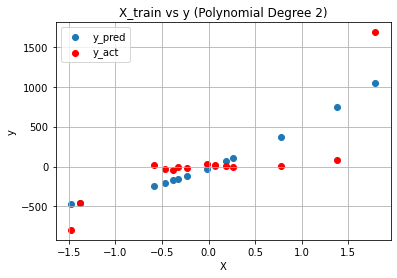

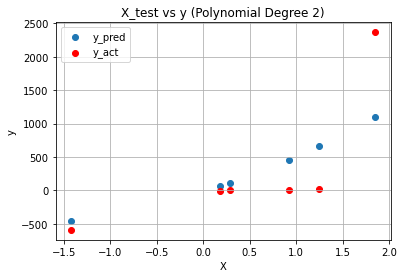

RMSE (train)(degree3) 142.49358680915768
RMSE (test)(degree3) 304.00199885093036


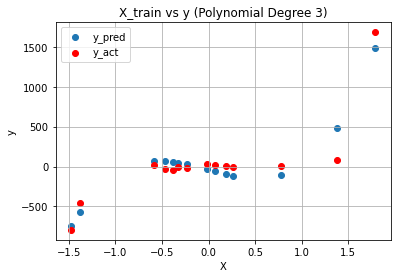

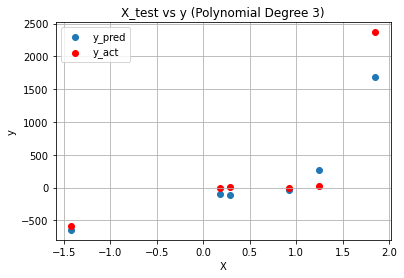

RMSE (train)(degree4) 96.3000816808143
RMSE (test)(degree4) 192.97876067128155


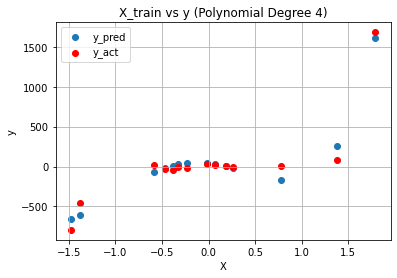

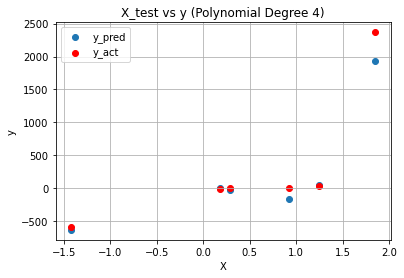

RMSE (train)(degree5) 25.23438306657935
RMSE (test)(degree5) 108.34698920208409


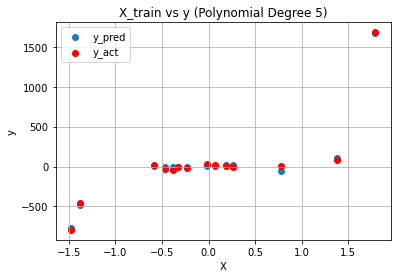

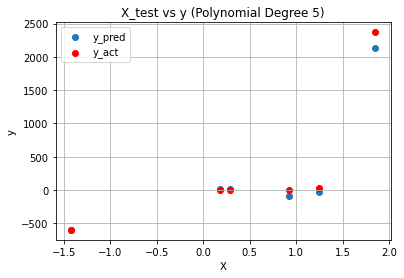

RMSE (train)(degree6) 26.005947905849805
RMSE (test)(degree6) 106.366456061915


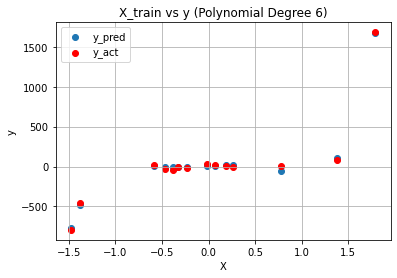

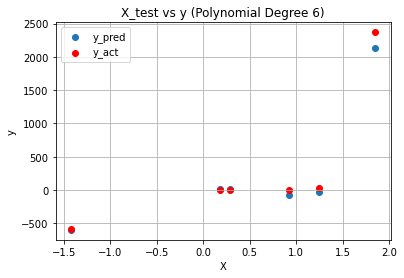

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.488e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree7) 19.493859756935677
RMSE (test)(degree7) 58.67370428545307


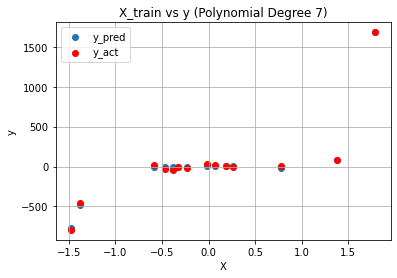

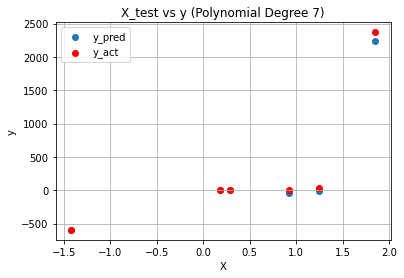

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree8) 18.09707850145231
RMSE (test)(degree8) 68.81083511091671


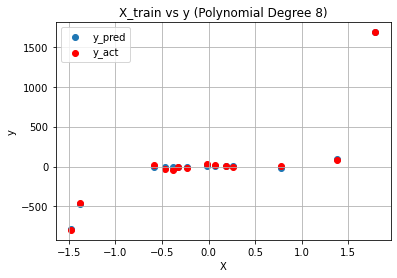

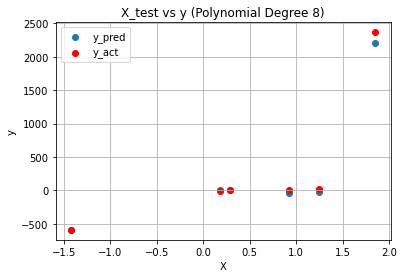

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree9) 17.65135805464912
RMSE (test)(degree9) 28.941808416090435


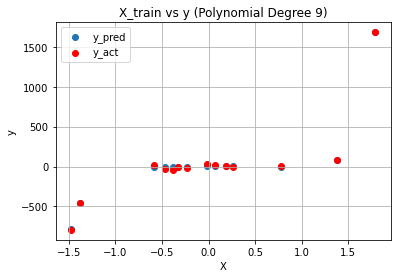

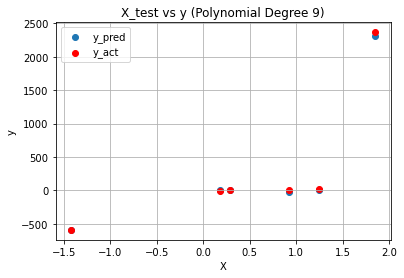

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.702e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree10) 17.63320413802235
RMSE (test)(degree10) 50.214123752999754


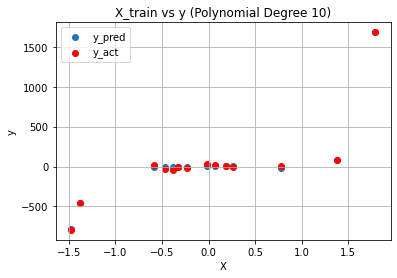

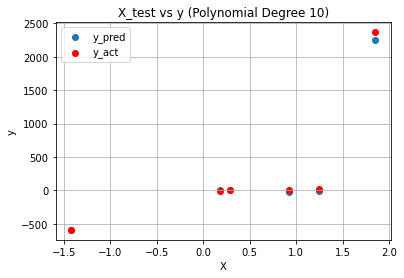

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.525e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree11) 17.2960616982414
RMSE (test)(degree11) 8.333716537974574


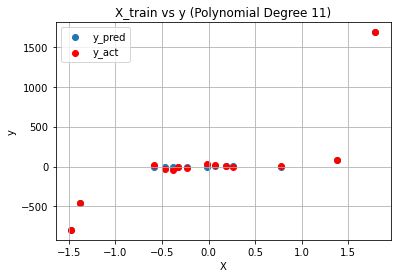

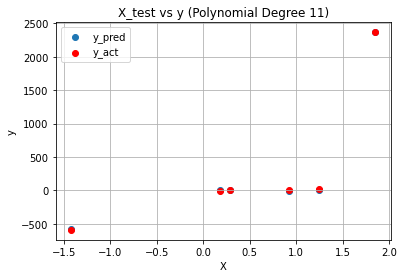

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree12) 17.65963827018428
RMSE (test)(degree12) 33.38093194975612


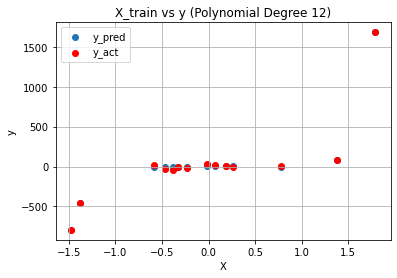

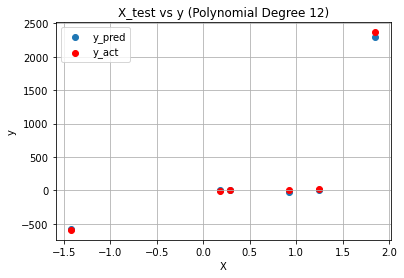

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.307e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree13) 17.224766544791336
RMSE (test)(degree13) 17.17397591932325


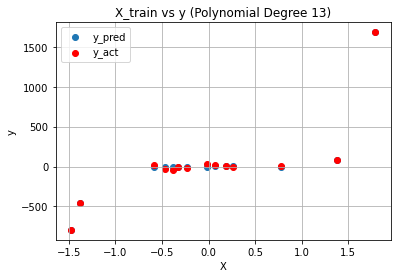

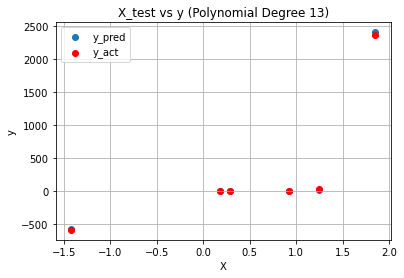

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.639e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree14) 17.343089233634498
RMSE (test)(degree14) 19.53508971887696


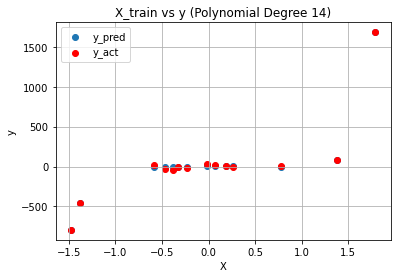

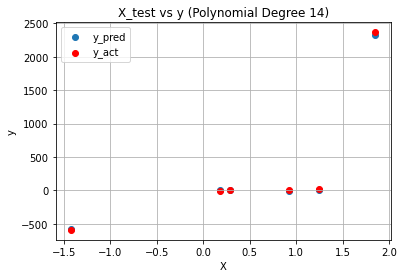

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.265e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree15) 17.236769135897152
RMSE (test)(degree15) 29.215322377991015


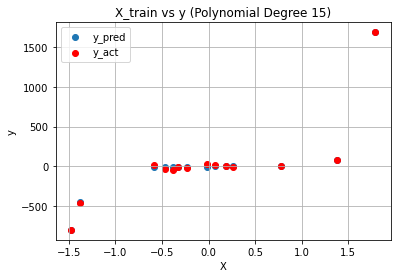

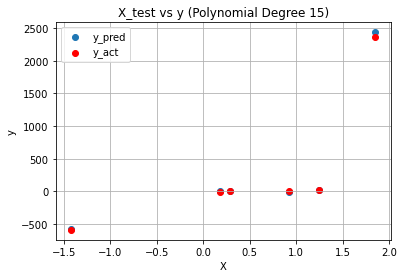

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.720e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree16) 17.254178201003107
RMSE (test)(degree16) 10.524890998686605


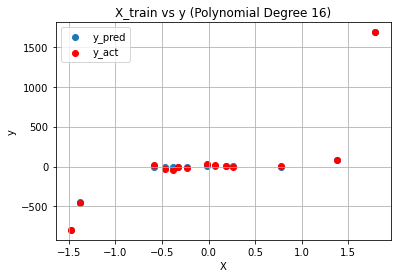

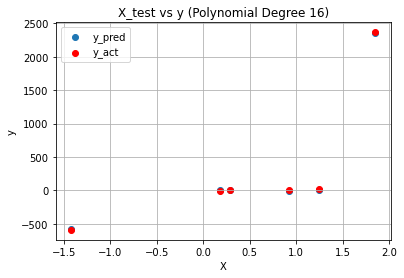

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree17) 17.247308197620928
RMSE (test)(degree17) 38.39642494636921


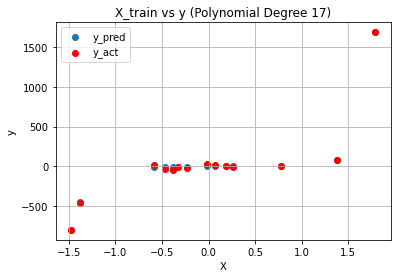

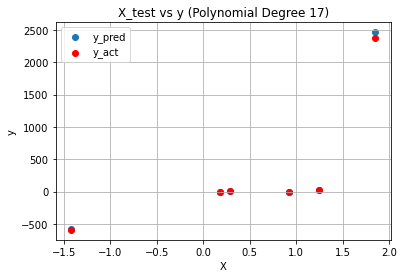

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree18) 17.241723247527506
RMSE (test)(degree18) 10.045216675280887


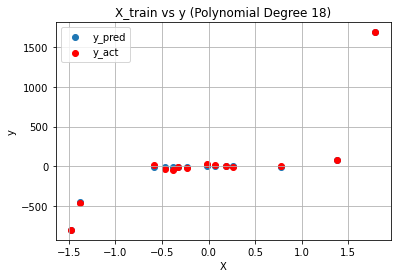

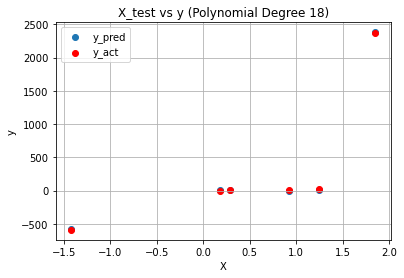

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree19) 17.253002803529103
RMSE (test)(degree19) 44.81835556866946


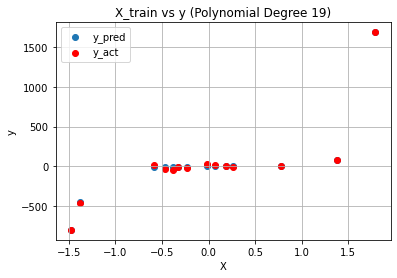

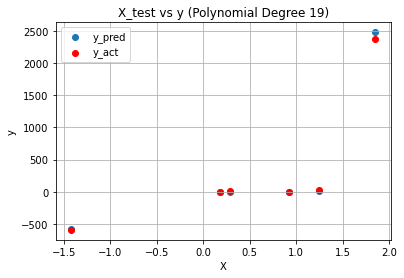

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

df1 = pd.read_csv("train_1.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Lasso()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

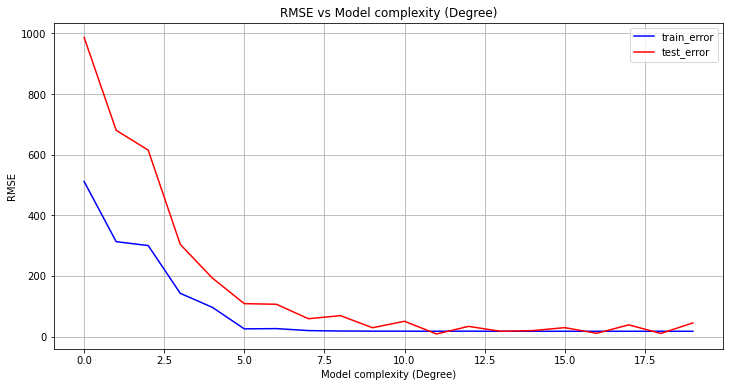

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test:  19.323864001006125


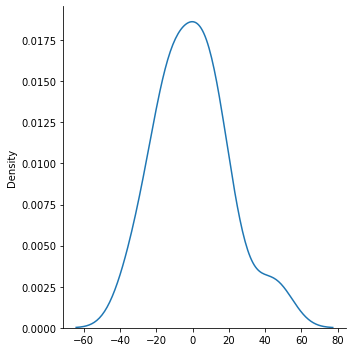

In [20]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 11)
x_poly = poly.fit_transform(X_t)
model = Lasso()
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))
# print(np.mean(y_pred),np.std(y_pred))

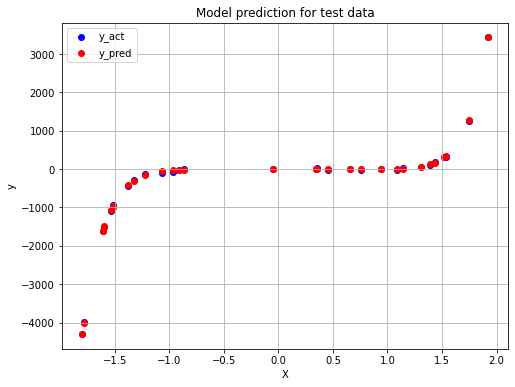

Optimized weights: [ 0.          1.80723136 -4.96989216  0.         -0.         -7.6457008
 -6.50483084 13.98301197 -5.2835221   6.30503634 -1.30101369  1.67614421]


In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)

## for 70 data points

## 1. Polynomial regression without regularisation

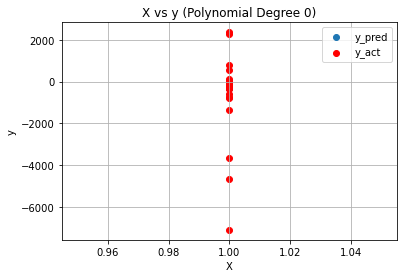

RMSE (degree2) 1116.705122870296
RMSE (degree2) 925.5716424818761


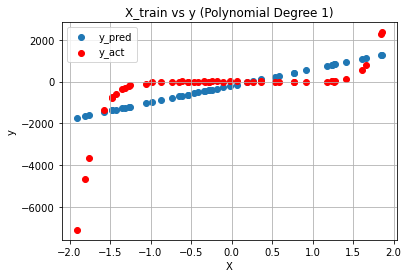

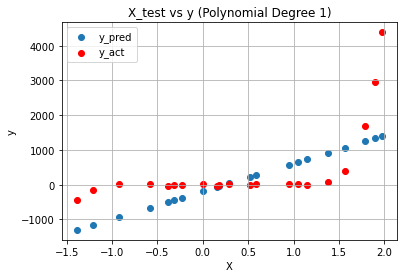

RMSE (degree3) 1016.9081234705316
RMSE (degree3) 1246.1727711641308


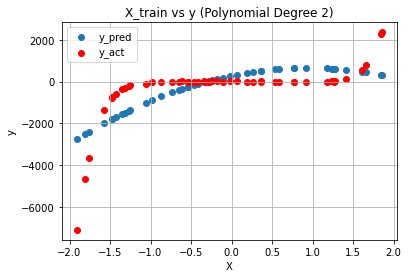

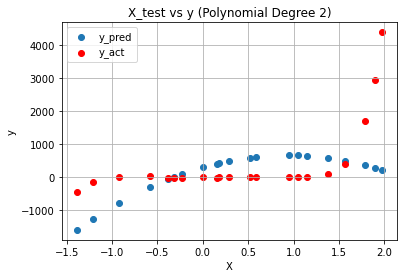

RMSE (degree4) 553.8228159701251
RMSE (degree4) 458.3093423586833


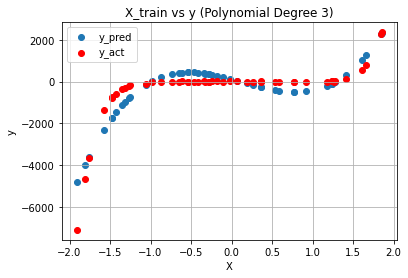

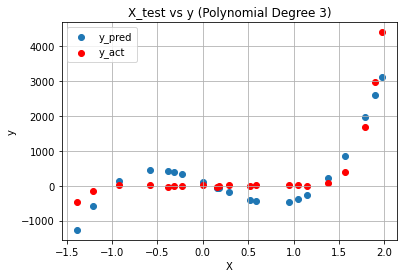

RMSE (degree5) 444.6581750217112
RMSE (degree5) 695.882066182524


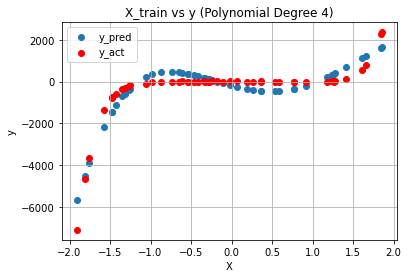

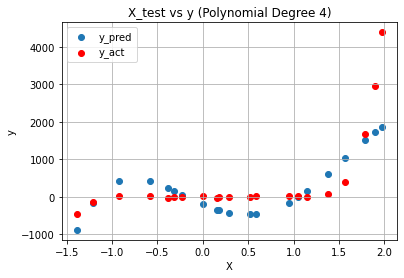

RMSE (degree6) 138.74253803022228
RMSE (degree6) 145.44946373716013


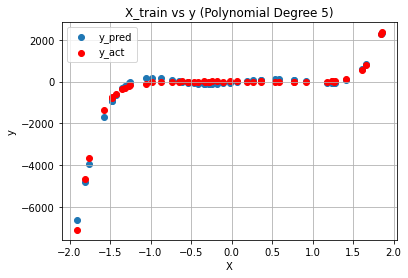

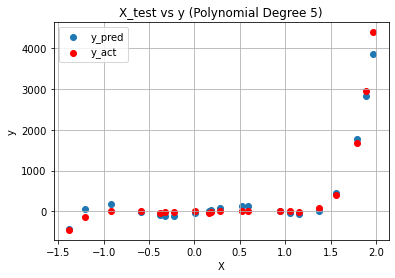

RMSE (degree7) 107.32861295508042
RMSE (degree7) 276.35343224337356


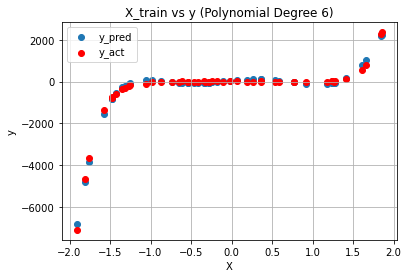

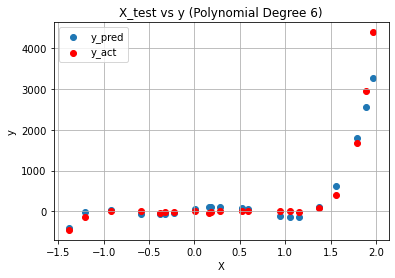

RMSE (degree8) 26.16345366327315
RMSE (degree8) 36.51014052887601


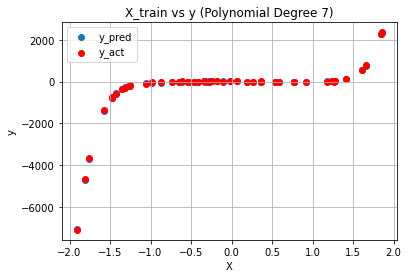

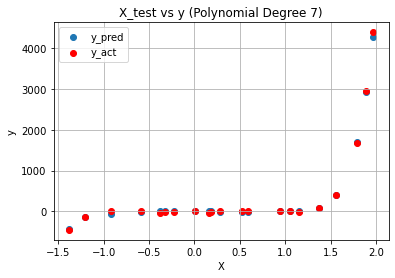

RMSE (degree9) 22.01860007632886
RMSE (degree9) 68.63764921098176


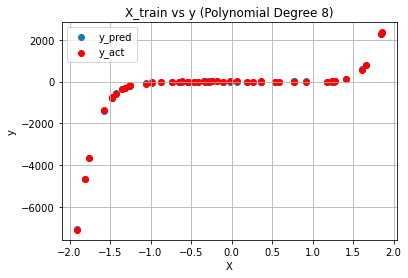

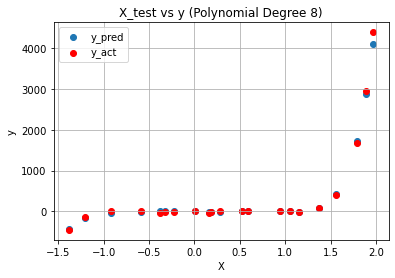

RMSE (degree10) 18.452431779830306
RMSE (degree10) 24.750192991969218


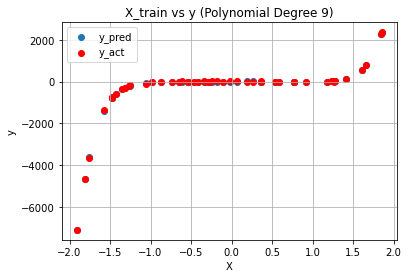

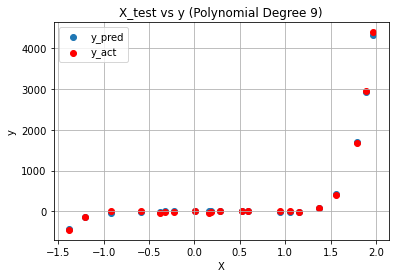

RMSE (degree11) 18.451075229678054
RMSE (degree11) 23.781628308087253


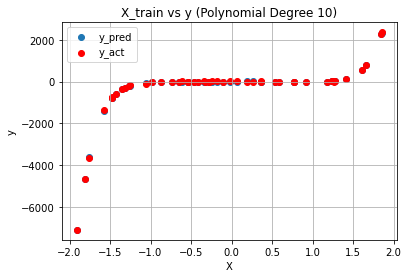

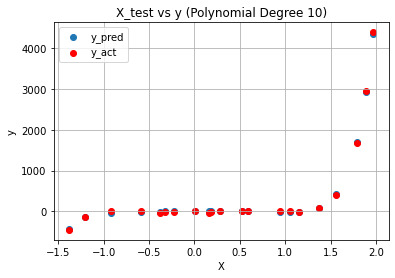

RMSE (degree12) 18.431692282048157
RMSE (degree12) 33.48321098343215


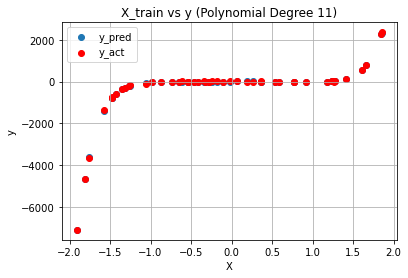

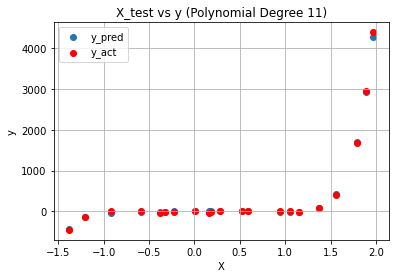

RMSE (degree13) 18.266539989685743
RMSE (degree13) 46.14819016598474


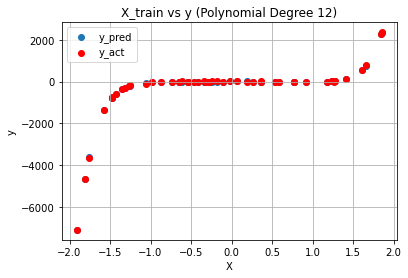

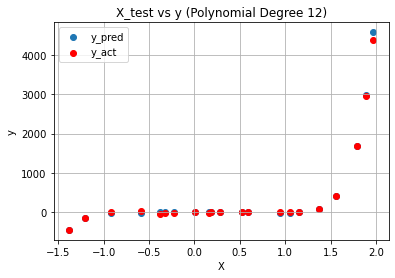

RMSE (degree14) 17.799629292294153
RMSE (degree14) 243.00698905486811


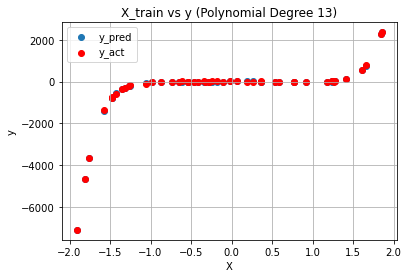

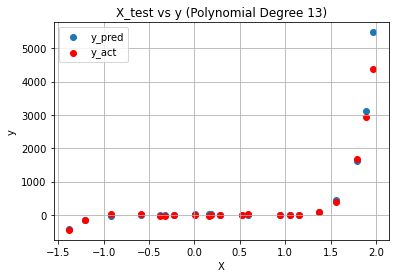

RMSE (degree15) 17.591313813777845
RMSE (degree15) 24.348856367852633


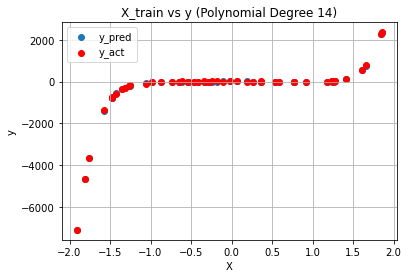

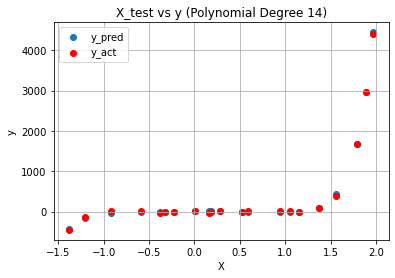

RMSE (degree16) 17.586584044509316
RMSE (degree16) 62.04313081137057


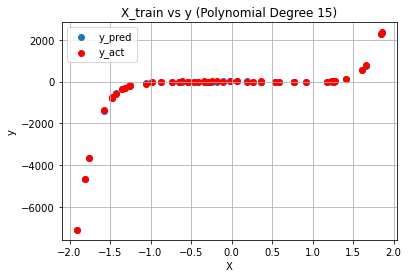

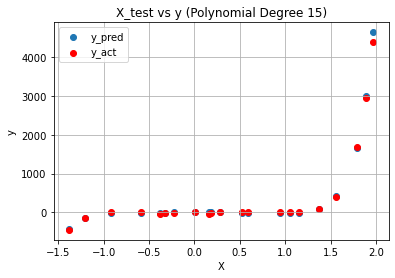

RMSE (degree17) 17.549300728754584
RMSE (degree17) 212.91161979693007


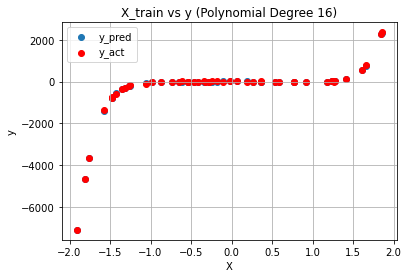

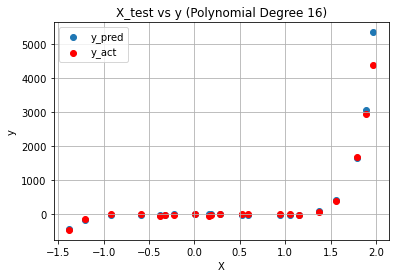

RMSE (degree18) 17.068065614192772
RMSE (degree18) 942.8258715667511


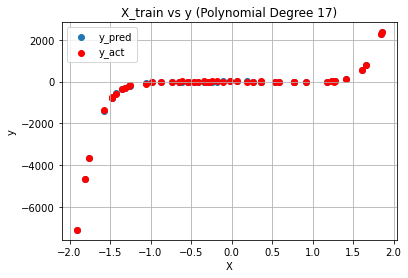

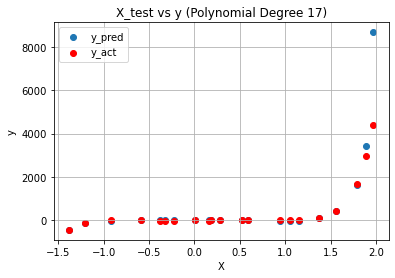

RMSE (degree19) 17.05616558807404
RMSE (degree19) 784.520311967865


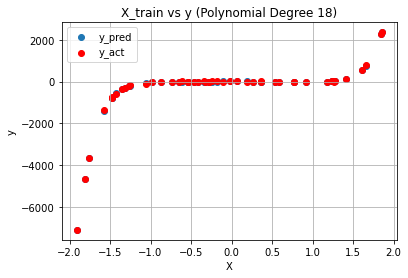

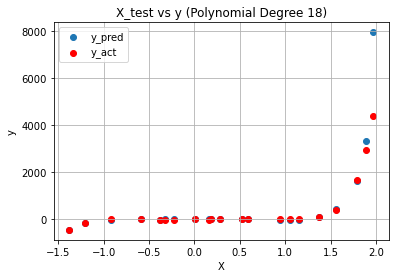

In [28]:
df1 = pd.read_csv("train_1.csv",header=None)
df = df1
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

n = len(y_train)
m= len(y_test)

X_list_train=[np.ones((n,1))]
X_list_test=[np.ones((m,1))]
w_ml_list = []

X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
w_ml_list.append(w_ml)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
plt.scatter(X_l_train,y_pred,label='y_pred')
plt.scatter(X_l_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y (Polynomial Degree 0)")
plt.legend()
plt.grid(visible=True)
plt.show()

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(2,max_degree):
    X_l_train = np.ones((n,1))
    X_l_test = np.ones((m,1))
    for j in range(1,i):
        X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
        X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
    X_list_train.append(X_l_train)
    X_list_test.append(X_l_test)
    w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
    w_ml_list.append(w_ml)
    y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
    y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

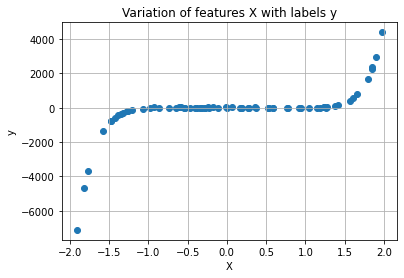

In [29]:
plt.figure()
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Variation of features X with labels y')
plt.grid()
plt.show()

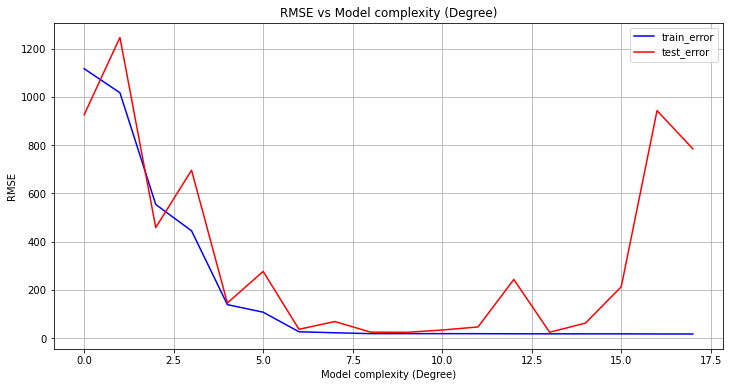

In [30]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree-2),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree-2),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

mean: 8.580253061340119e-11 , standard daviation:  26.16345366327315 variance:  684.5263075902411


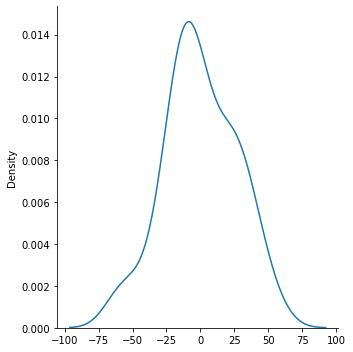

In [31]:
import seaborn as sns
n = len(y_train)
m= len(y_test)
X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
degree=8
for j in range(1,degree):
    X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
    X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise = (y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')
# plt.hist(train_noise,bins=10,density='kde')
print('mean:' ,np.mean(train_noise), ', standard daviation: ', np.std(train_noise), 'variance: ', np.std(train_noise)**2)

((array([-2.19599143, -1.82390984, -1.60415342, -1.44238152, -1.31143954,
         -1.19978245, -1.10136375, -1.01259654, -0.93116649, -0.85548631,
         -0.78441521, -0.71710218, -0.6528925 , -0.59126912, -0.53181425,
         -0.47418332, -0.41808671, -0.36327662, -0.30953737, -0.25667804,
         -0.20452679, -0.1529263 , -0.10173007, -0.05079928,  0.        ,
          0.05079928,  0.10173007,  0.1529263 ,  0.20452679,  0.25667804,
          0.30953737,  0.36327662,  0.41808671,  0.47418332,  0.53181425,
          0.59126912,  0.6528925 ,  0.71710218,  0.78441521,  0.85548631,
          0.93116649,  1.01259654,  1.10136375,  1.19978245,  1.31143954,
          1.44238152,  1.60415342,  1.82390984,  2.19599143]),
  array([-59.81444608, -59.56858411, -48.34659068, -39.56944595,
         -29.74279771, -26.3071719 , -25.97582745, -23.94700439,
         -22.32838414, -19.76978454, -18.86711474, -14.81844143,
         -14.67861751, -14.14087323, -14.09229218, -12.24603358,
         -1

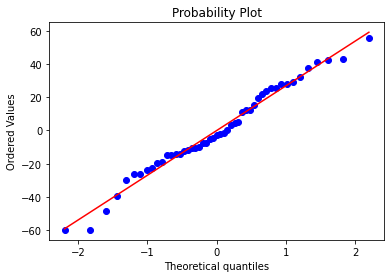

In [32]:
stats.probplot(train_noise,dist='norm',plot=pylab,)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-111.20103557,  -68.6865597 ,  -40.86663482,  -25.44807259,
          -23.66977948,  -17.25926725,  -11.91369931,   -8.97554345,
           -5.09262546,    0.84381311,    3.56155633,    4.52091404,
            5.3611764 ,    8.02982137,    9.34160223,   11.35263739,
           32.8905558 ,   33.1306147 ,   36.55617202,   37.8479733 ,
           46.83559261])),
 (36.911361239570965, -3.9447994441898837, 0.9437637594500705))

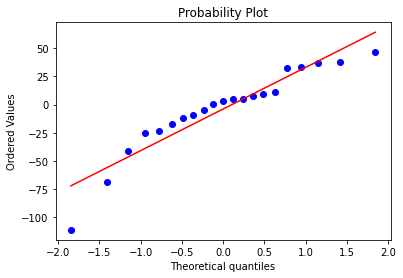

In [33]:
test_noise = y_test_pred.reshape(-1)-y_test
stats.probplot(test_noise,plot=pylab)

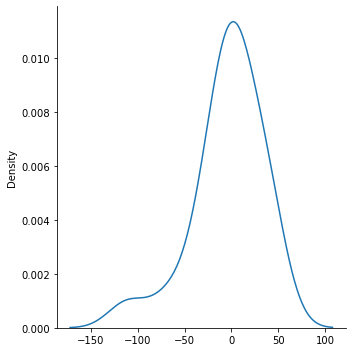

In [34]:
sns.displot(test_noise,kind='kde')

In [35]:
print('mean:' ,np.mean(test_noise), ', standard daviation: ', np.std(test_noise), 'variance: ', np.std(test_noise)**2)

mean: -3.9447994441898815 , standard daviation:  36.29640366184223 variance:  1317.4289187833938


rmse for test:  28.308916172611653


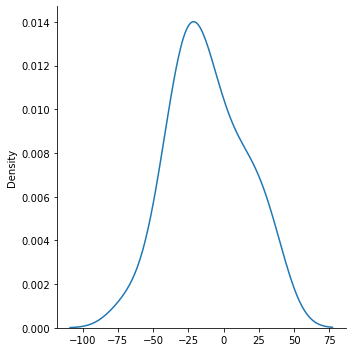

In [36]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])
m = len(y_t)
X_l_test = np.ones((m,1))




for j in range(1,degree):
    X_l_test = np.append(X_l_test, np.vstack(X_t**j),axis = 1)
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise = (y_test_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_test_pred,y_t)))

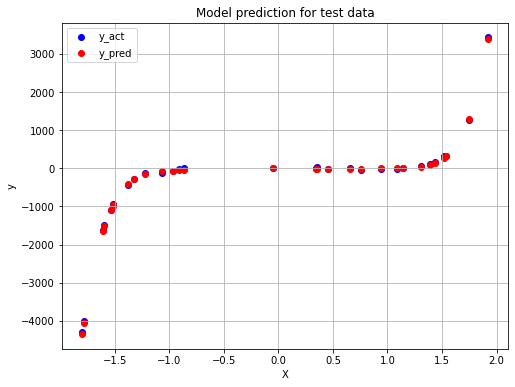

Optimized weights: [  14.95773476  -59.61124312 -147.46123218  288.98435095  183.83057957
 -321.47886693  -81.36688592  123.7652708 ]


In [37]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' ,w_ml)

## Overfitting

In [38]:
import seaborn as sns
n = len(y_train)
m= len(y_test)
X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
degree=25
for j in range(1,degree):
    X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
    X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))

In [39]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])
m = len(y_t)
X_l_test = np.ones((m,1))




for j in range(1,degree):
    X_l_test = np.append(X_l_test, np.vstack(X_t**j),axis = 1)
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise = (y_test_pred.reshape(-1)-y_t)
# sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_test_pred,y_t)))

rmse for test:  2076.712617562586


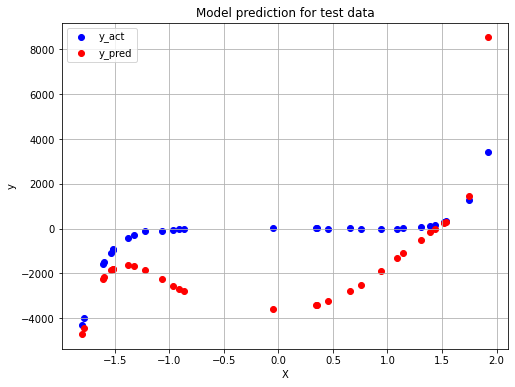

Optimized weights: [-3.60318315e+03  1.19962671e+02  8.35637476e+02  1.20558490e+03
  1.58331394e+03 -4.81214836e+03  5.13327964e+02  1.23811856e+04
 -5.30306762e+03 -1.81686017e+04  6.99380987e+03  1.62536065e+04
 -3.23331949e+03 -9.54634685e+03 -1.05359340e+03  3.92570549e+03
  2.04843586e+03 -1.17349561e+03 -1.09970752e+03  2.49033672e+02
  3.03914598e+02 -3.31664378e+01 -4.38740783e+01  2.02390877e+00
  2.62551031e+00]


In [40]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' ,w_ml)

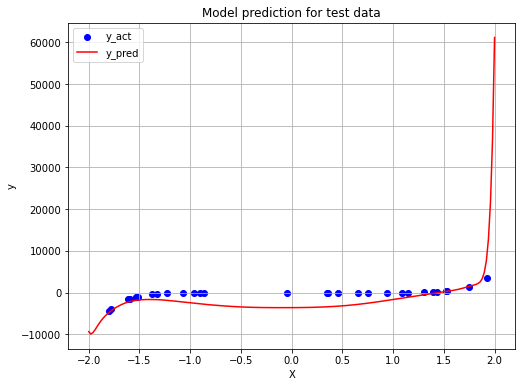

In [41]:
x_p = np.linspace(-2,2,200)
X_p = np.ones((len(x_p),1))
for j in range(1,degree):
    X_p = np.append(X_p, np.vstack(x_p**j),axis = 1)
y_p = np.dot(X_p,w_ml.reshape(-1,1))
# y_p = model.predict(X_p)
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.plot(x_p,y_p,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()

## 2. Polynomial regression with L2 regularisation

RMSE (train)(degree0) 511.3768470489386
RMSE (test)(degree0) 986.5817662451113


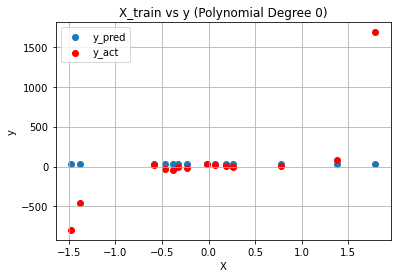

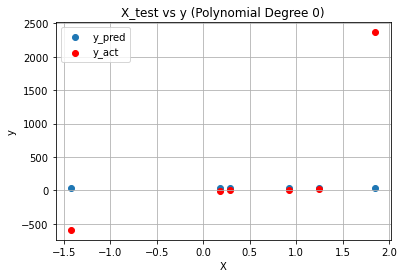

RMSE (train)(degree1) 314.75262798896085
RMSE (test)(degree1) 695.1106594458764


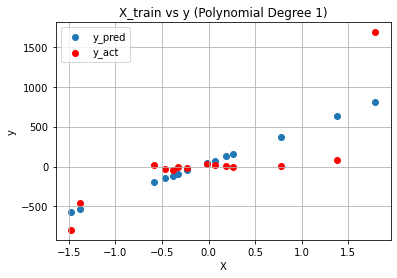

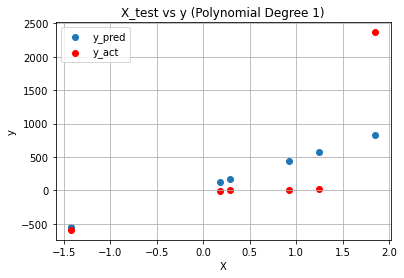

RMSE (train)(degree2) 301.8040262309747
RMSE (test)(degree2) 627.4695649503306


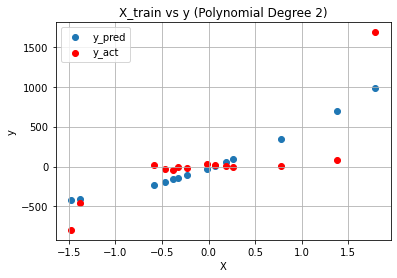

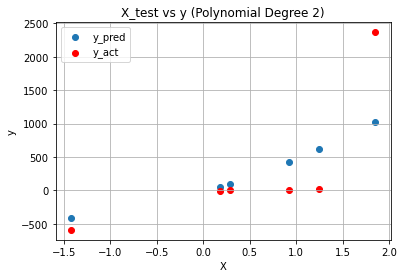

RMSE (train)(degree3) 153.8617708940249
RMSE (test)(degree3) 352.95972224210004


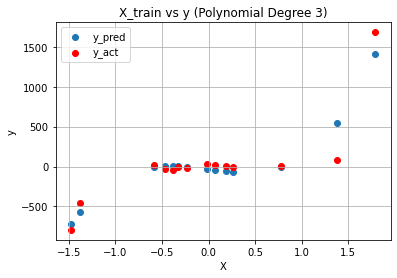

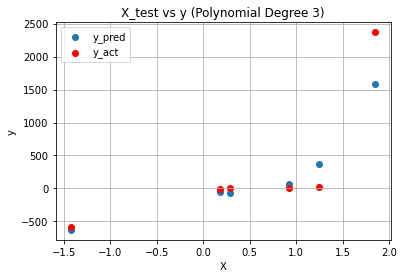

RMSE (train)(degree4) 121.02285785204745
RMSE (test)(degree4) 266.8278940002661


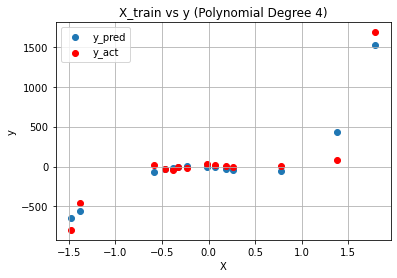

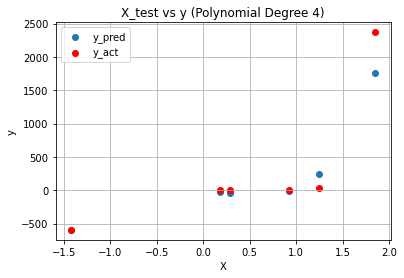

RMSE (train)(degree5) 55.52015625261628
RMSE (test)(degree5) 150.8185887275162


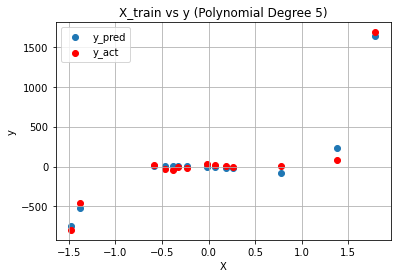

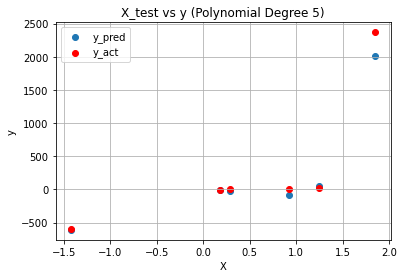

RMSE (train)(degree6) 48.83740053657409
RMSE (test)(degree6) 120.32046408175242


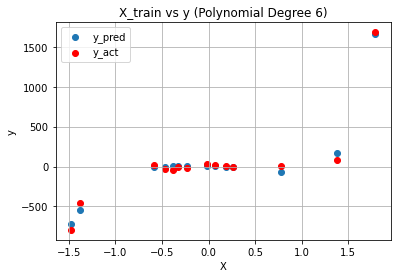

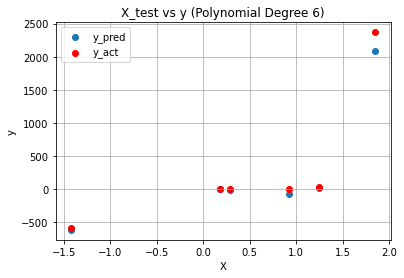

RMSE (train)(degree7) 20.673877275682557
RMSE (test)(degree7) 58.48556987867051


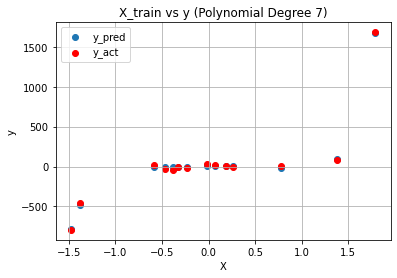

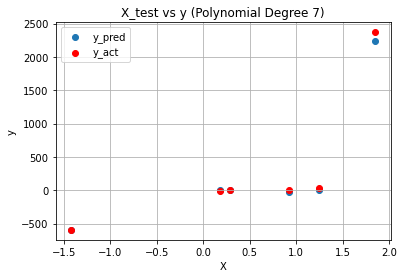

RMSE (train)(degree8) 20.972737460296987
RMSE (test)(degree8) 52.747806172727074


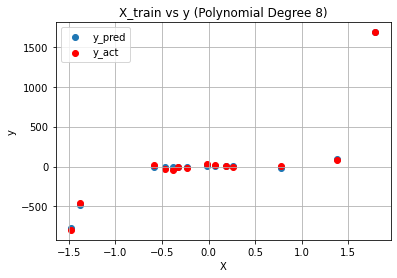

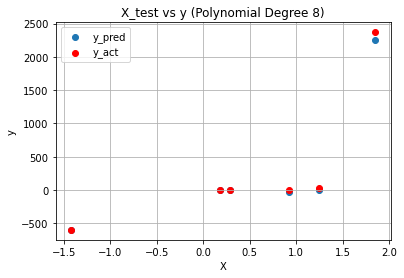

RMSE (train)(degree9) 16.958312032996126
RMSE (test)(degree9) 6.378444134649313


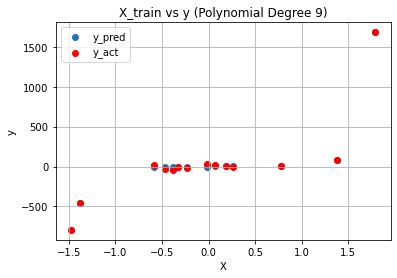

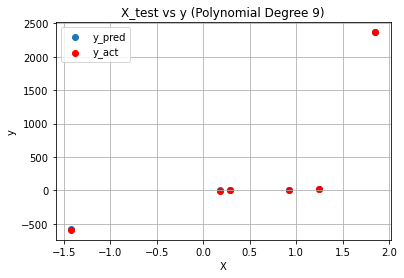

RMSE (train)(degree10) 16.958325744462485
RMSE (test)(degree10) 6.2821550202781875


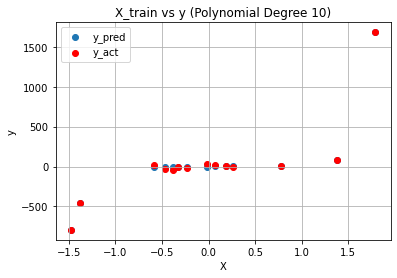

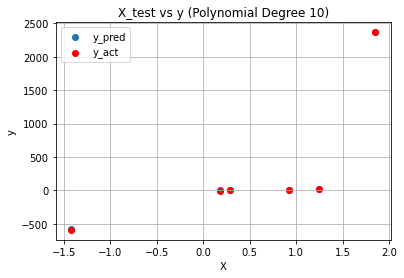

RMSE (train)(degree11) 16.991915448173707
RMSE (test)(degree11) 34.857191262696816


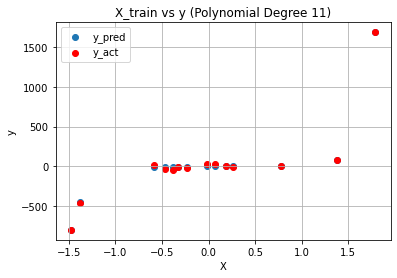

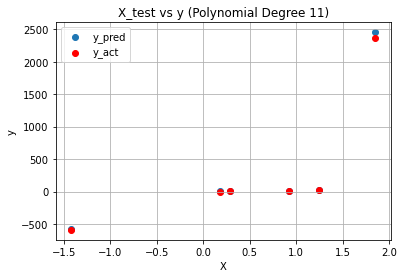

RMSE (train)(degree12) 16.97812840865511
RMSE (test)(degree12) 53.24747595375931


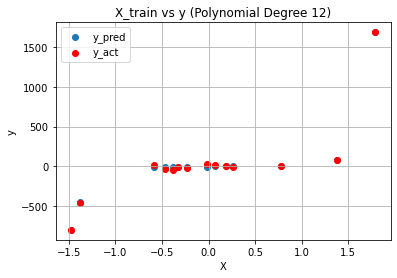

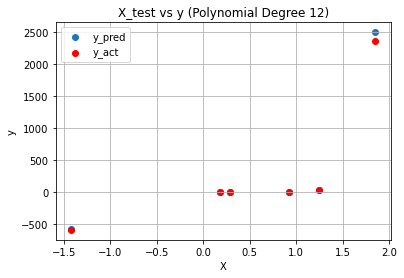

RMSE (train)(degree13) 16.96469056256078
RMSE (test)(degree13) 35.67127451554945


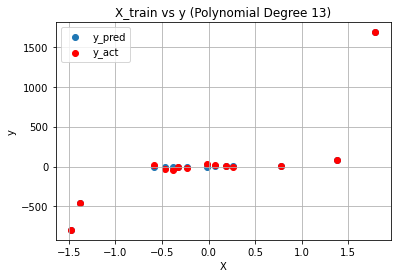

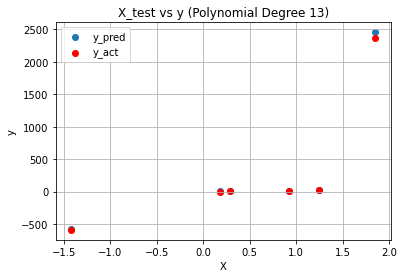

RMSE (train)(degree14) 16.956555575143437
RMSE (test)(degree14) 116.54539244262438


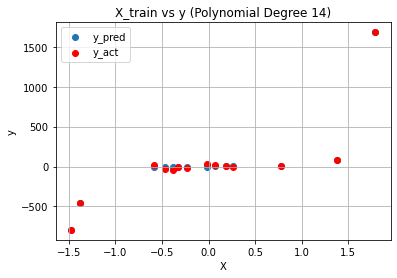

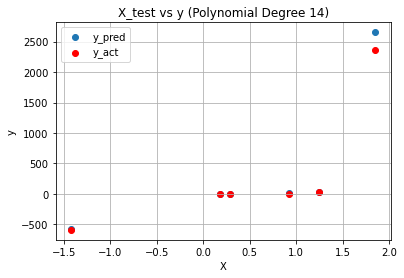

RMSE (train)(degree15) 16.932541880343944
RMSE (test)(degree15) 35.3188252624819


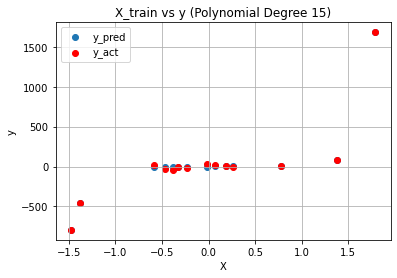

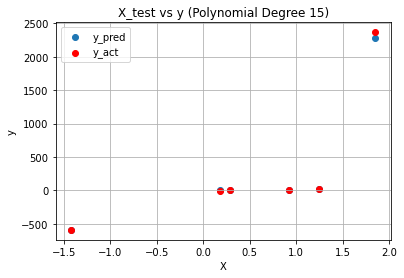

RMSE (train)(degree16) 16.929051736132745
RMSE (test)(degree16) 202.7814719534138


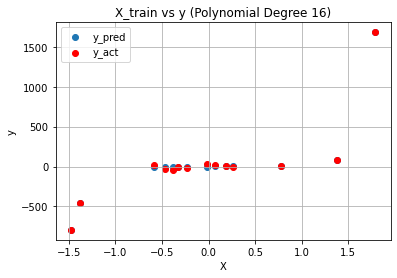

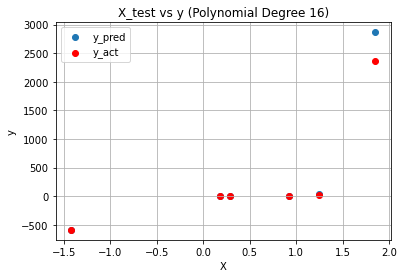

RMSE (train)(degree17) 16.91473443413335
RMSE (test)(degree17) 250.80163359096886


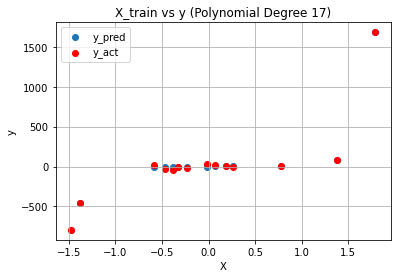

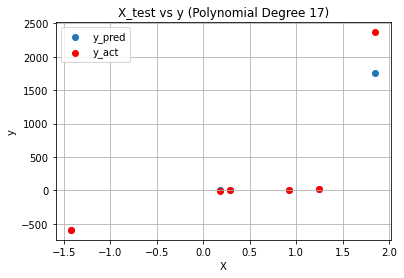

RMSE (train)(degree18) 16.913364325336453
RMSE (test)(degree18) 337.2287438032054


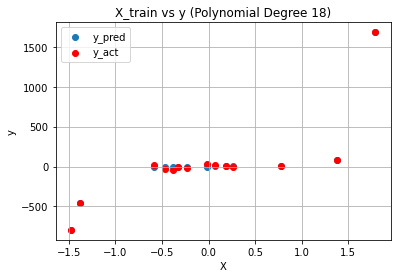

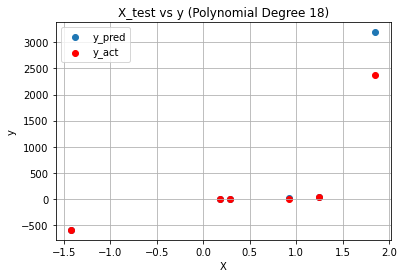

RMSE (train)(degree19) 16.906659213184987
RMSE (test)(degree19) 752.6345480057989


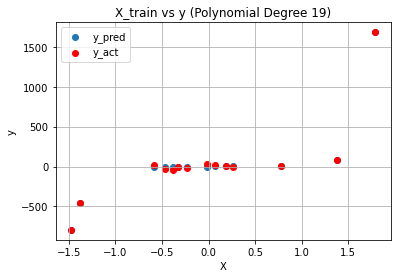

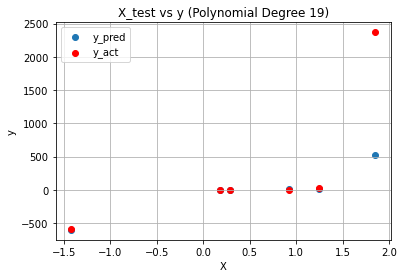

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
df1 = pd.read_csv("train_1.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Ridge()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

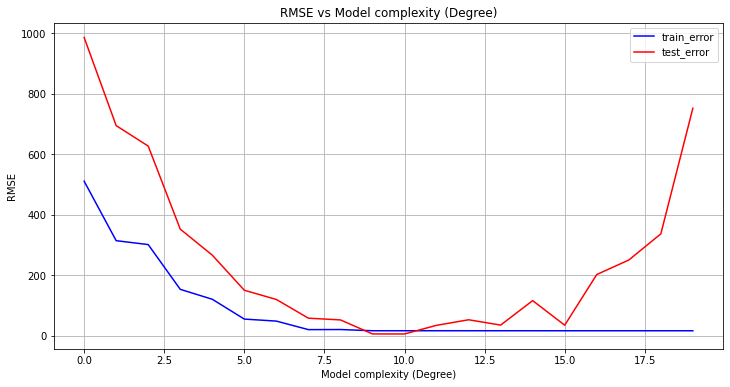

In [36]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test:  18.578180721577894
mean: 9.012050365223938e-14 , standard daviation:  18.578180721577894 variance:  345.1487989236085


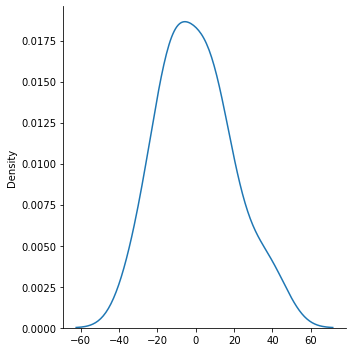

In [37]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 10)
x_poly = poly.fit_transform(X_t)
model = Ridge(alpha=1)
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))
print('mean:' ,np.mean(test_noise), ', standard daviation: ', np.std(test_noise), 'variance: ', np.std(test_noise)**2)

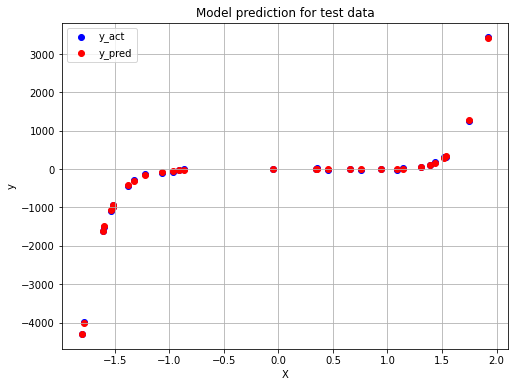

Optimized weights: [  0.           5.53923695 -16.54244629   5.18883088   0.67780585
   1.49173158   7.00927409  -8.85229183 -13.71870738  17.74258549
   0.10908416]


In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)

In [39]:
l = []
for i in model.coef_:
    l.append(float(f'{i:.1f}'))

## 3. Polynomial regression with L1 regularisation

RMSE (train)(degree0) 511.3768470489386
RMSE (test)(degree0) 986.5817662451113


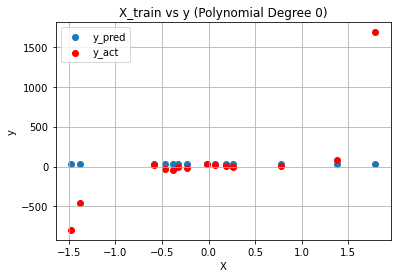

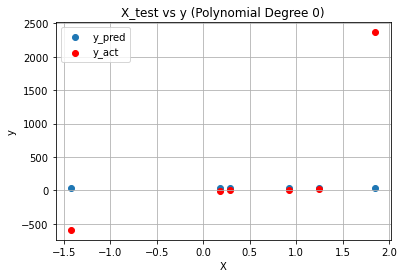

RMSE (train)(degree1) 312.8712499047878
RMSE (test)(degree1) 680.3144011828291


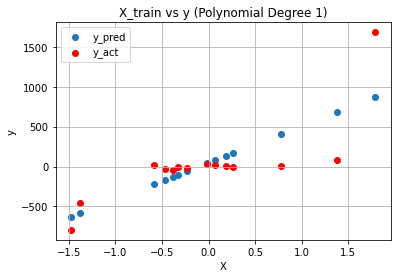

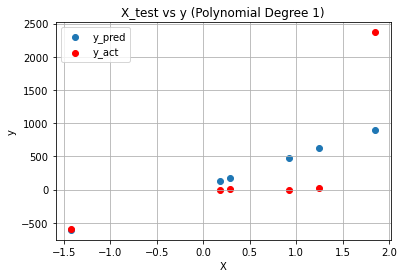

RMSE (train)(degree2) 300.04018778813116
RMSE (test)(degree2) 614.8386042465646


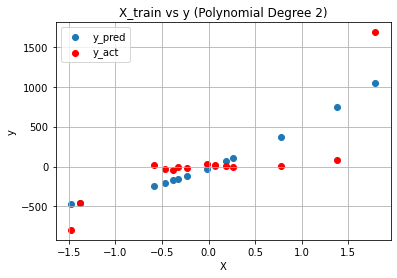

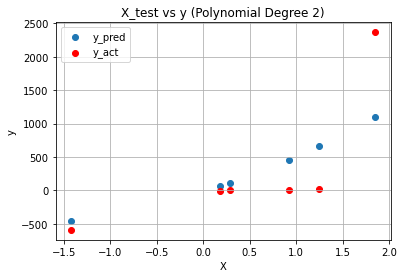

RMSE (train)(degree3) 142.49358680915768
RMSE (test)(degree3) 304.00199885093036


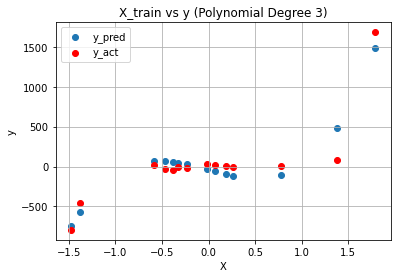

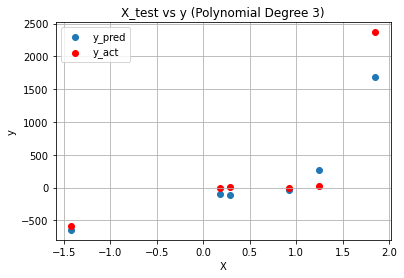

RMSE (train)(degree4) 96.3000816808143
RMSE (test)(degree4) 192.97876067128155


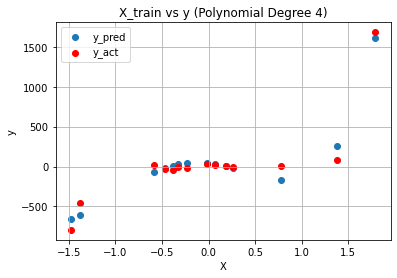

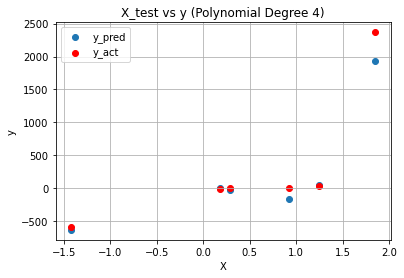

RMSE (train)(degree5) 25.23438306657935
RMSE (test)(degree5) 108.34698920208409


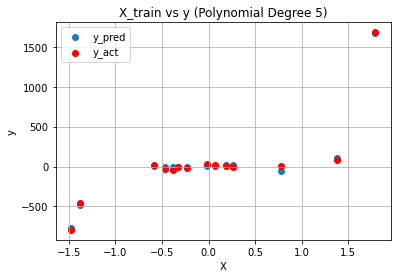

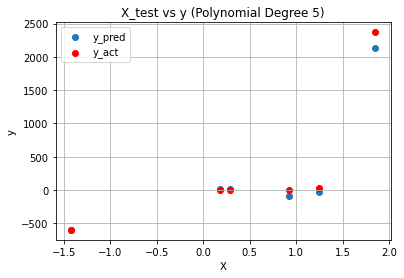

RMSE (train)(degree6) 26.005947905849805
RMSE (test)(degree6) 106.366456061915


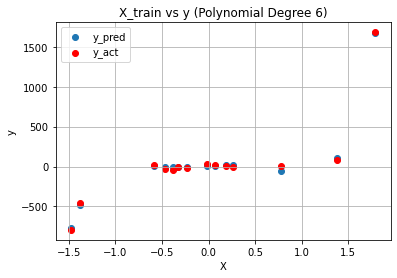

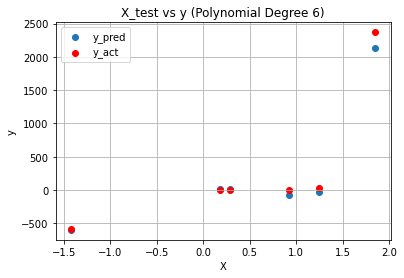

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.488e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree7) 19.493859756935677
RMSE (test)(degree7) 58.67370428545307


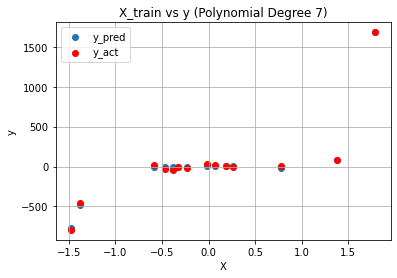

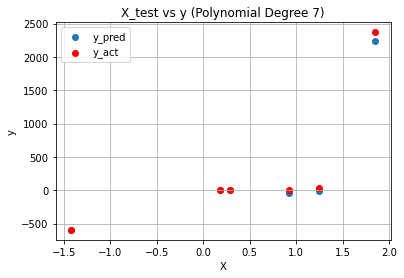

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree8) 18.09707850145231
RMSE (test)(degree8) 68.81083511091671


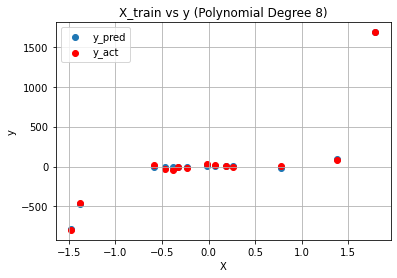

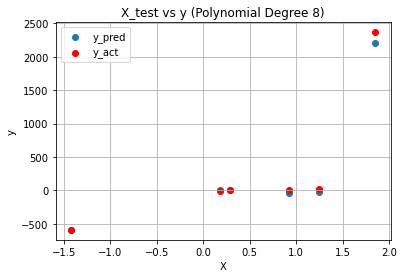

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree9) 17.65135805464912
RMSE (test)(degree9) 28.941808416090435


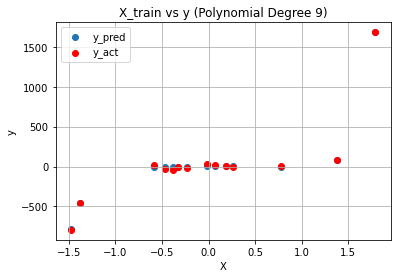

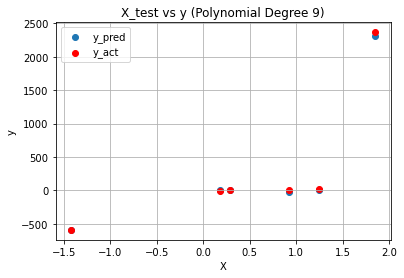

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.702e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree10) 17.63320413802235
RMSE (test)(degree10) 50.214123752999754


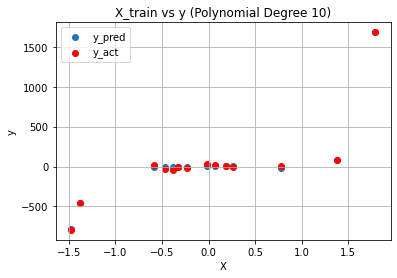

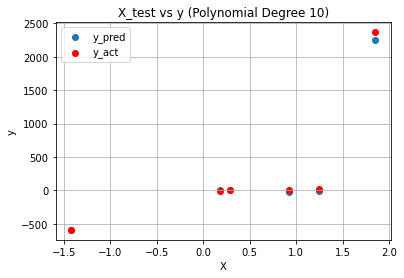

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.525e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree11) 17.2960616982414
RMSE (test)(degree11) 8.333716537974574


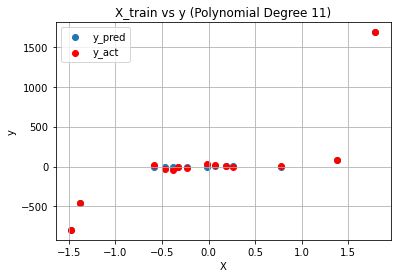

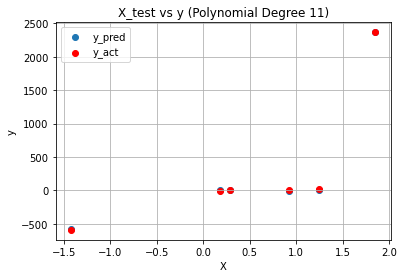

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree12) 17.65963827018428
RMSE (test)(degree12) 33.38093194975612


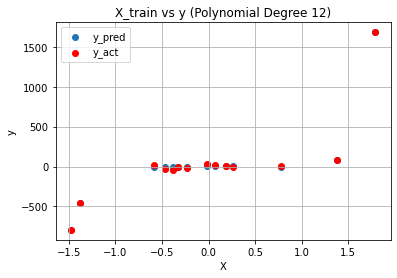

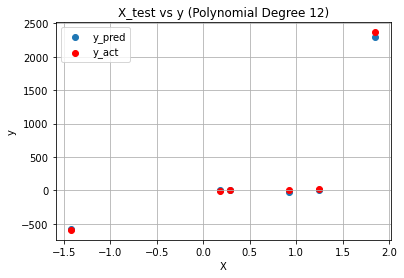

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.307e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree13) 17.224766544791336
RMSE (test)(degree13) 17.17397591932325


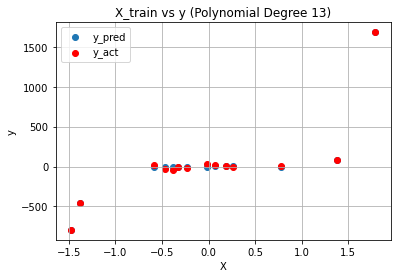

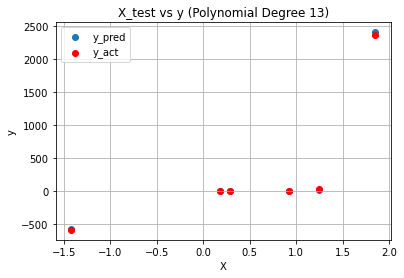

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.639e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree14) 17.343089233634498
RMSE (test)(degree14) 19.53508971887696


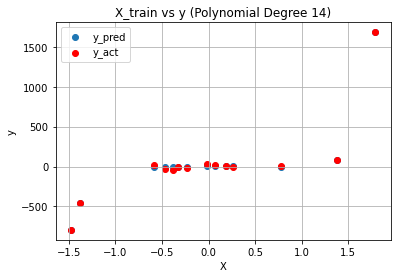

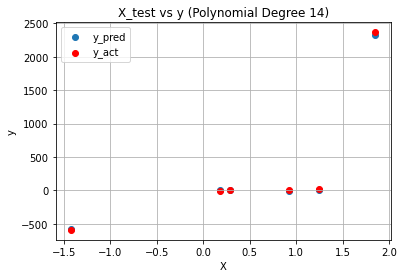

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.265e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree15) 17.236769135897152
RMSE (test)(degree15) 29.215322377991015


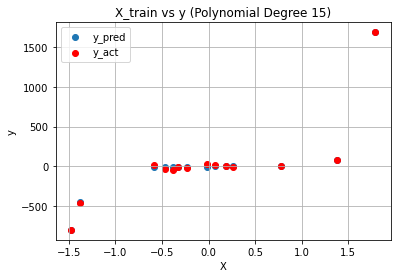

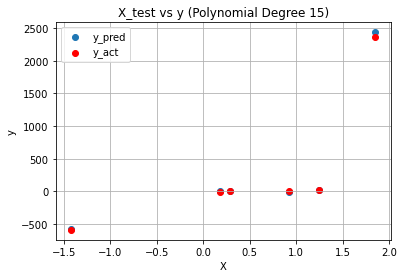

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.720e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree16) 17.254178201003107
RMSE (test)(degree16) 10.524890998686605


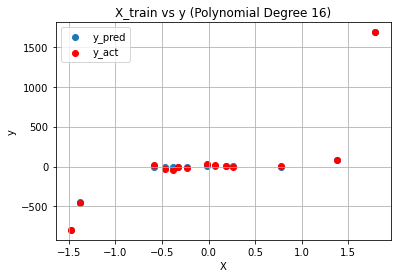

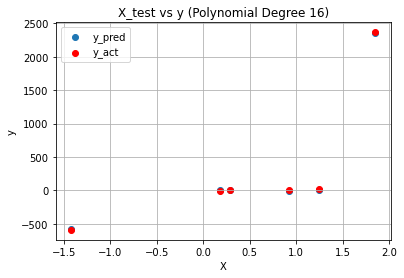

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree17) 17.247308197620928
RMSE (test)(degree17) 38.39642494636921


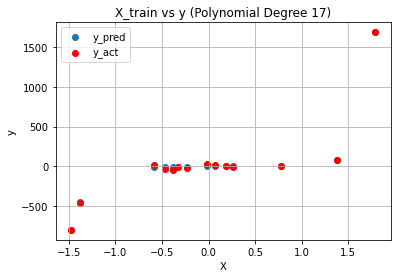

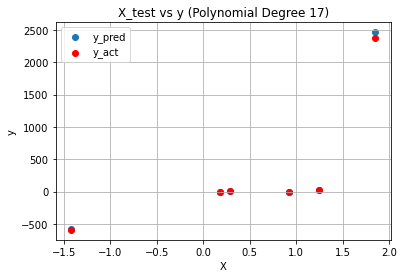

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree18) 17.241723247527506
RMSE (test)(degree18) 10.045216675280887


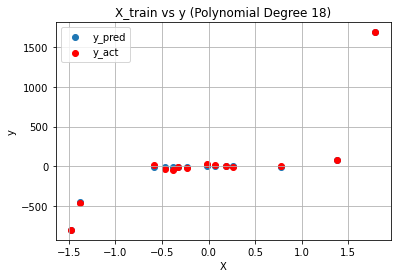

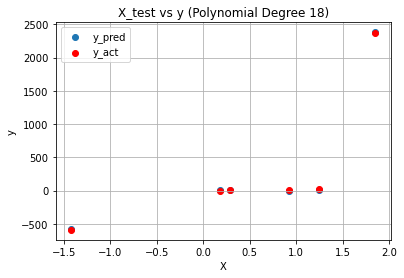

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+03, tolerance: 3.661e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree19) 17.253002803529103
RMSE (test)(degree19) 44.81835556866946


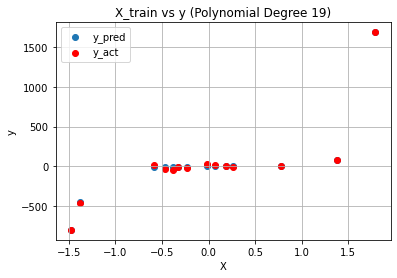

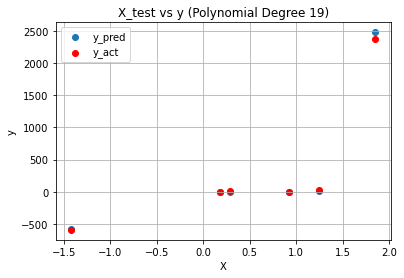

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

df1 = pd.read_csv("train_1.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Lasso()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

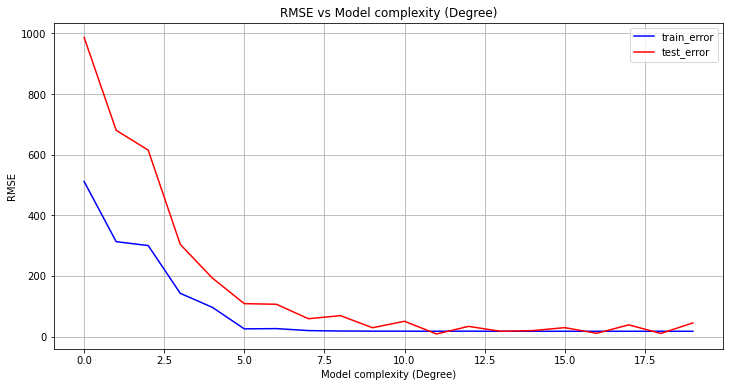

In [41]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test:  19.323864001006125
mean: 1.8355687340469256e-14 , standard daviation:  19.323864001006125 variance:  373.41171992938047


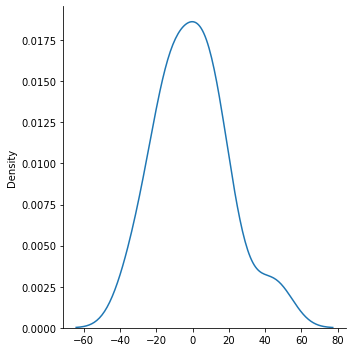

In [42]:
df_test = pd.read_csv('test_1.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 11)
x_poly = poly.fit_transform(X_t)
model = Lasso()
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))
print('mean:' ,np.mean(test_noise), ', standard daviation: ', np.std(test_noise), 'variance: ', np.std(test_noise)**2)

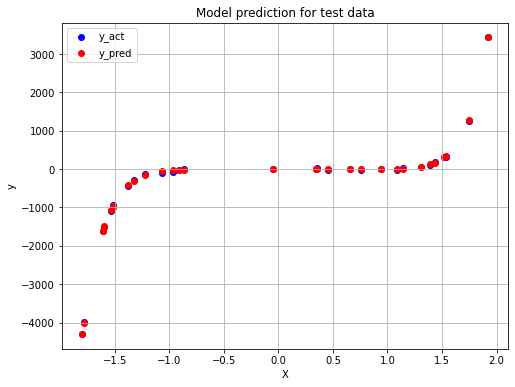

Optimized weights: [ 0.          1.80723136 -4.96989216  0.         -0.         -7.6457008
 -6.50483084 13.98301197 -5.2835221   6.30503634 -1.30101369  1.67614421]


In [43]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)

## Gradient Descent

In [44]:
df1 = pd.read_csv("train_1.csv",header=None)
df = df1
X = np.array(df[0]).reshape(-1,1)
t =np.array(df[1])
w = np.zeros(4)
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(X)
phi = x_poly
y = x_poly @ w.T

In [45]:
def objective_function(y,t):
    """ y: array of predicted values
        t: array of target values."""
    t = t.reshape(-1,1)
    y = y.reshape(-1,1)
    
    E = 0.5 * (t-y).T @ (t-y)
    return E

In [46]:
objective_function(y,t)

array([[66109244.96994659]])

In [47]:
t = t.reshape(1,-1)
phi = phi.reshape(-1,len(w))

In [48]:
def param_init(X): 
    """
    Initialize parameters for linear regression model
    __________________ 
    Input(s)
    X: Training data
    __________________
    Output(s)
    params: Dictionary containing coefficients
    """
    params = {} # initialize dictionary 
    _, n_features = X.shape # shape of training data
# initializing coefficients to 0 
    params["W"] = np.zeros(n_features)
    params["b"] = 0
    return params

def gradient_descent(X, y, params, alpha, n_iter): 
    """
    Gradient descent to minimize cost function
    __________________ 
    Input(s)
    X: Training data
    y: Labels
    params: Dictionary containing random coefficients
    alpha: Model learning rate
    n_iter: The number of iterations of Gradient descent
    __________________
    Output(s)
    params: Dictionary containing optimized coefficients
    """
    W = params["W"] 
    b = params["b"]
    m = X.shape[0] # number of training instances 
    for _ in range(n_iter): 
        # prediction with random weights
        y_pred = np.dot(X.T, W) + b
        # taking the partial derivative of coefficients
#         print(X.shape)
#         print(y.shape)
#         print(y_pred.shape)
        dW = (2/m) * np.dot(X, (y_pred - y.reshape(-1))) 
        db = (2/m) * np.sum(y_pred -  y)
        # updates to coefficients
        W -= alpha * dW
        b -= alpha * db 
    
    params["W"] = W
    params["b"] = b
    return params

In [49]:
def grad2(phi,t,w):
    s1 = np.matmul(t, phi)  # (1,20)*(20,2) = (1,2)
    s2 = np.matmul(phi.T,phi)   # (2,20)*(20,2) = (2,2) 
    
    grad = s1 - np.matmul(w,s2)   # (1,2) - (1,2) * (2,2) = (1,2)
    
    return grad

In [50]:
# def gradient(phi,t,w):
#     N = len(t)
#     M = len(w)
#     s1 = np.zeros(M)
#     s2 = np.zeros((M,M))
#     for i in range(N):
#         s1 += t[i]*phi[i]
# #         print(phi[i])
#         s2 += np.matmul(phi[i].reshape(-1,1),phi[i].reshape(-1,1).T)
# #         print(s2)
#     print(s2)
#     print(s1)
#     grad = s1 - np.dot(w.reshape(1,-1),s2).reshape(2)
# #     print(np.dot(w.reshape(1,-1),s2).shape)
#     return grad

In [51]:
grad2(phi,t,w)

array([[ -5135.757596  ,  65139.47973392,  -9602.08195331,
        213944.9826519 ]])

In [52]:
W = {'W':w,'b':[0.]}

# for i in range(20)
eta = 0.01
epoch = 100
grad = gradient_descent(phi.T,t,W,eta,epoch)
#     w = w - lr* grad
    
#     print(w,grad)

In [53]:
grad

{'W': array([-4.26347612e+29, -2.12948466e+30, -1.12995824e+30, -5.75796926e+30]),
 'b': array([-4.26347612e+29])}

In [54]:
y_pred = np.dot(phi,grad['W'])

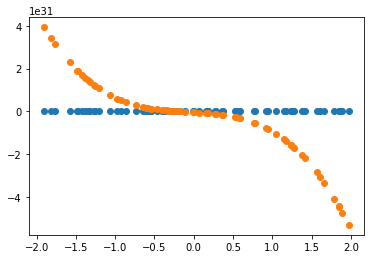

In [55]:
plt.scatter(X,t)
plt.scatter(X,y_pred)